In [1]:
import os

from pathlib import Path
from multistim.io import prepare_cytometry_data

import matplotlib.pyplot as plt
from matplotlib.pyplot import rc_context
import seaborn as sns

%matplotlib inline
%config InlineBackend.figure_format='retina'

import matplotlib as mpl
mpl.rcParams["figure.facecolor"] = 'white'

sns.set_theme(style="white", rc={"axes.facecolor": (0, 0, 0, 0)})

In [2]:
lineage_channels = [
 'In113Di (113In_CD235ab_CD61)',
 'In115Di (115In_CD45)',
 'La139Di (139La_CD66)',
 'Pr141Di (141Pr_CD7)',
 'Nd142Di (142Nd_CD19)',
 'Nd143Di (143Nd_CD45RA)',
 'Nd144Di (144Nd_CD11b)',
 'Nd145Di (145Nd_CD4)',
 'Nd146Di (146Nd_CD8a)',
 'Sm147Di (147Sm_CD11c)',
 'Sm148Di (148Sm_CD123)',
 'Sm149Di (149Sm_pCREB)',
 'Nd150Di (150Nd_pSTAT5)',
 'Eu151Di (151Eu_pP38)',
 'Sm152Di (152Sm_TCRgd)',
 'Eu153Di (153Eu_pSTAT1)',
 'Sm154Di (154Sm_pSTAT3)',
 'Gd155Di (155Gd_pS6)',
 'Gd156Di (156Gd_CD24)',
 'Gd158Di (158Gd_IkB)',
 'Tb159Di (159Tb_pMAPKAPK2)',
 'Dy160Di (160Dy_Tbet)',
 'Dy161Di (161Dy_cPARP)',
 'Dy162Di (162Dy_FoxP3)',
 'Dy163Di (163Dy_CRTH2)',
 'Dy164Di (164Dy_CD161)',
 'Ho165Di (165Ho_CD16)',
 'Er166Di (166Er_pNFkB)',
 'Er167Di (167Er_pERK1-2)',
 'Er168Di (168Er_pSTAT6)',
 'Tm169Di (169Tm_CD25)',
 'Er170Di (170Er_CD3)',
 'Yb171Di (171Yb_CD27)',
 'Yb172Di (172Yb_CD62L)', 
 'Yb173Di (173Yb_HLA-DR)',
 'Yb174Di (174Yb_PD-1)',
 'Lu175Di (175Lu_CD14)',
 'Lu176Di (176Lu_CD56)'
]

In [3]:
home_dir = str(Path.home())

adata = prepare_cytometry_data(
    data_dir=os.path.join(home_dir, "Desktop/Data/Preterm"),
    metadata=os.path.join(home_dir, "Desktop/Data/Preterm/meta.csv"),
    filename_col="FCS_File",
    lineage_channels=lineage_channels,
    num_workers=16,
    groupby="Stim",
    down_sample=10000,
    gate_kwds={
        'arcsinh': True,
        'cofactor': 5,
        'auto_channels': False,
        'gate_debris_removal': True,
        'gate_intact_cells': True,
        'gate_live_cells': False,
        'gate_center_offset_residual': True,
        'bead_normalization': False,
        'bead_channels': ['beadDist (beadDist)'],
        'time_channel': ['Time'],
        'cor_channels': ['Center', 'Offset', 'Residual'],
        'DNA_channels': ['Ir191Di (191Ir_DNA1)', 'Ir193Di (193Ir_DNA2)']
    },
    verbose=False,
)

[17:28:13] Reading and preprocessing 160 files. It may take a few minutes...

[17:39:58] Your data is converted into `AnnData`.

           Done!

In [4]:
adata_unstim = adata['Unstim']

In [5]:
import pandas as pd

df_unstim = pd.DataFrame(adata_unstim.X, index=adata_unstim.obs_names, columns=adata_unstim.var_names)
df_unstim['Plate_ID'] = adata_unstim.obs['Plate_ID']

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

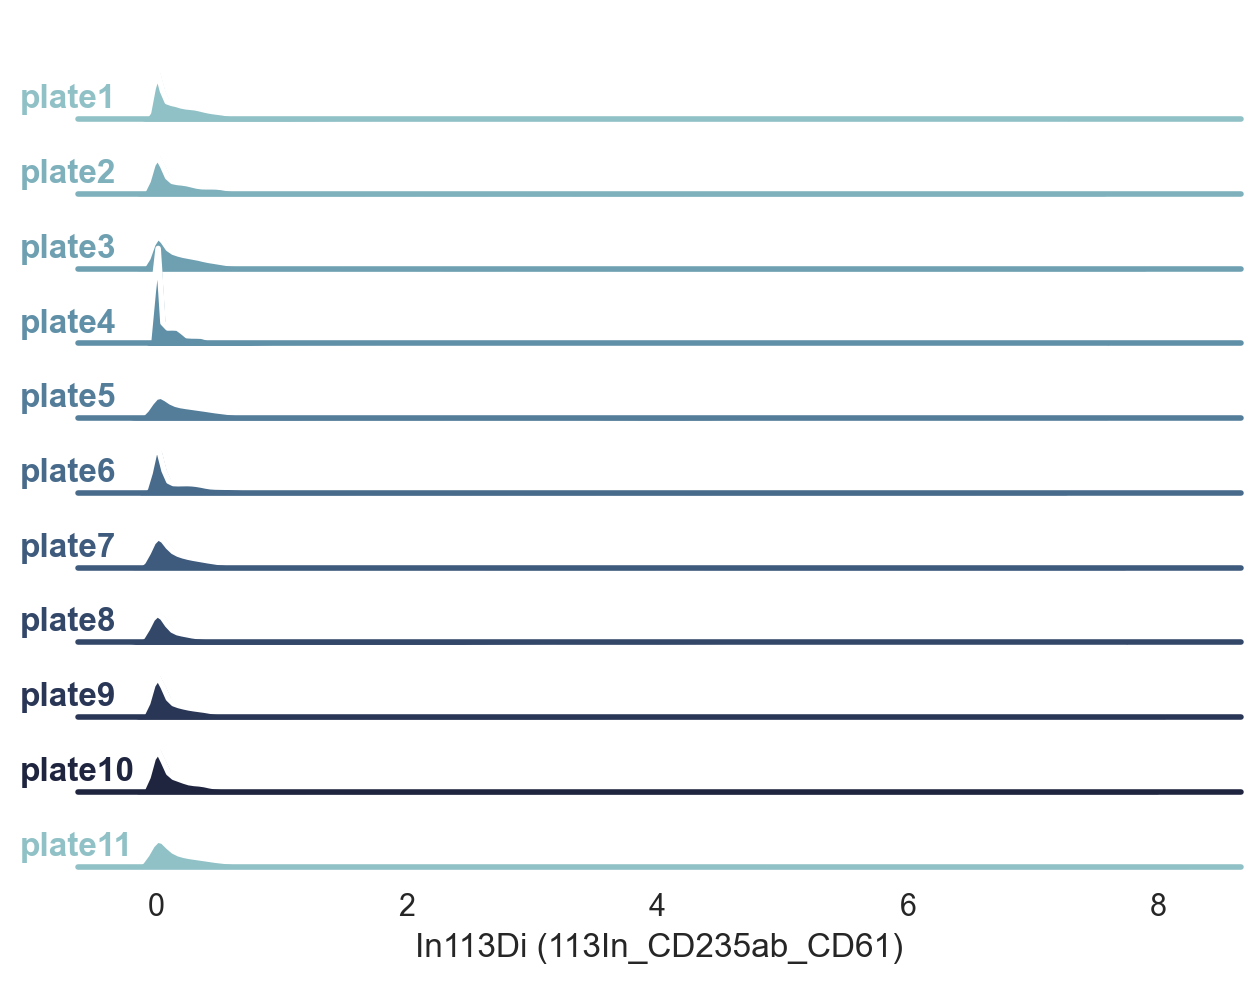

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

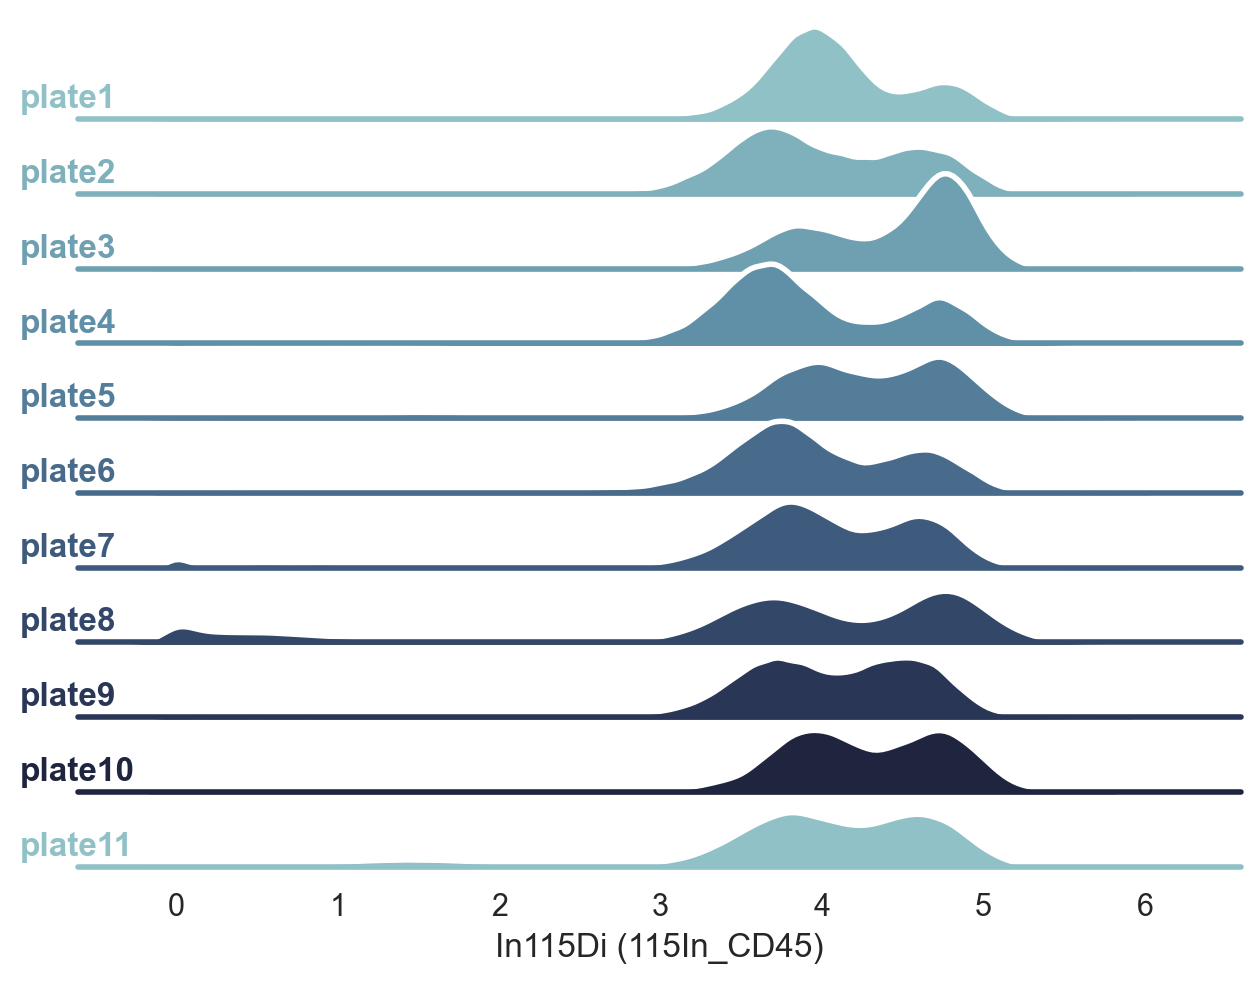

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

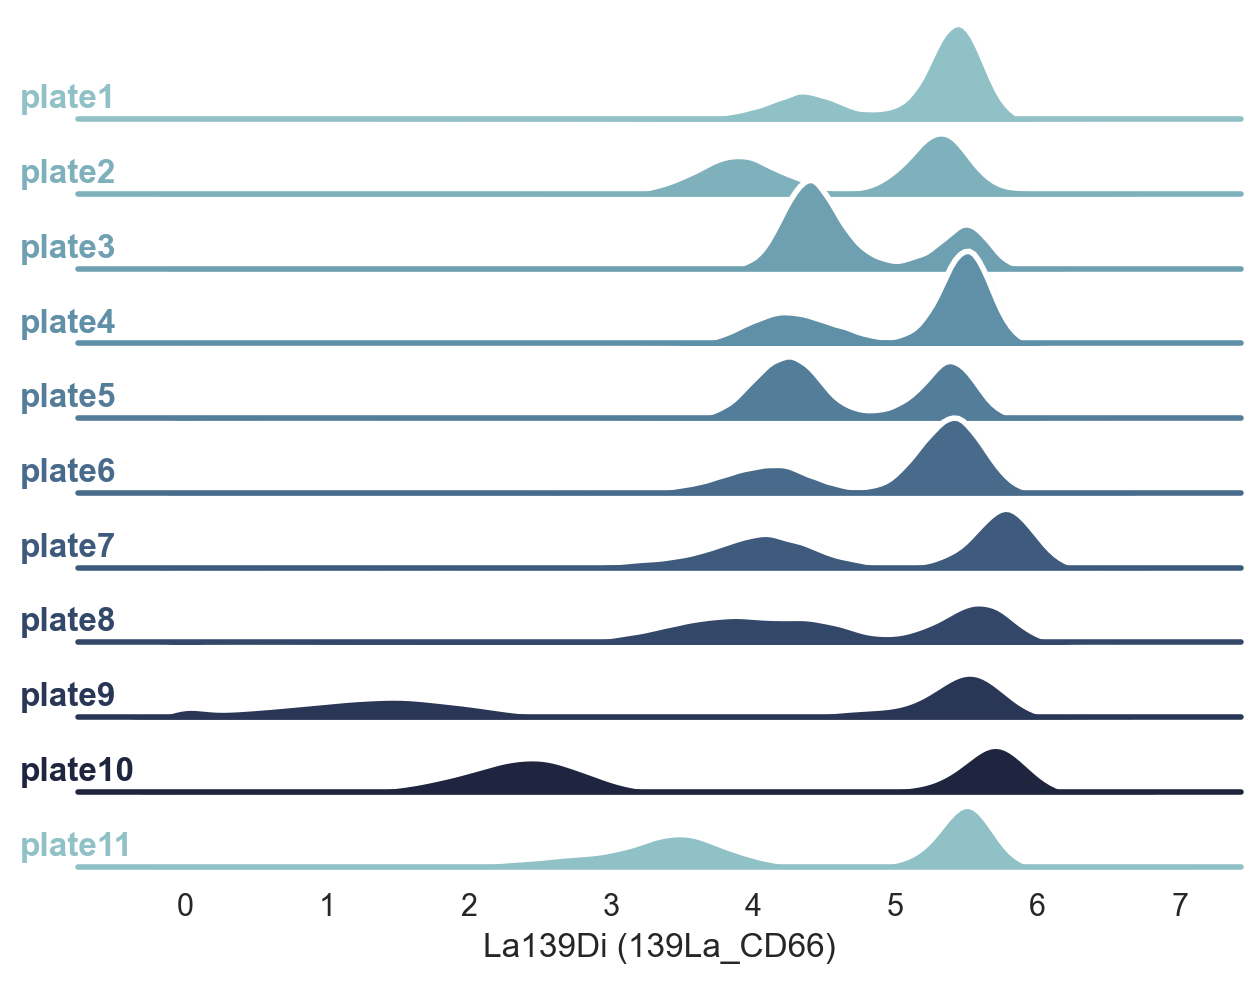

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

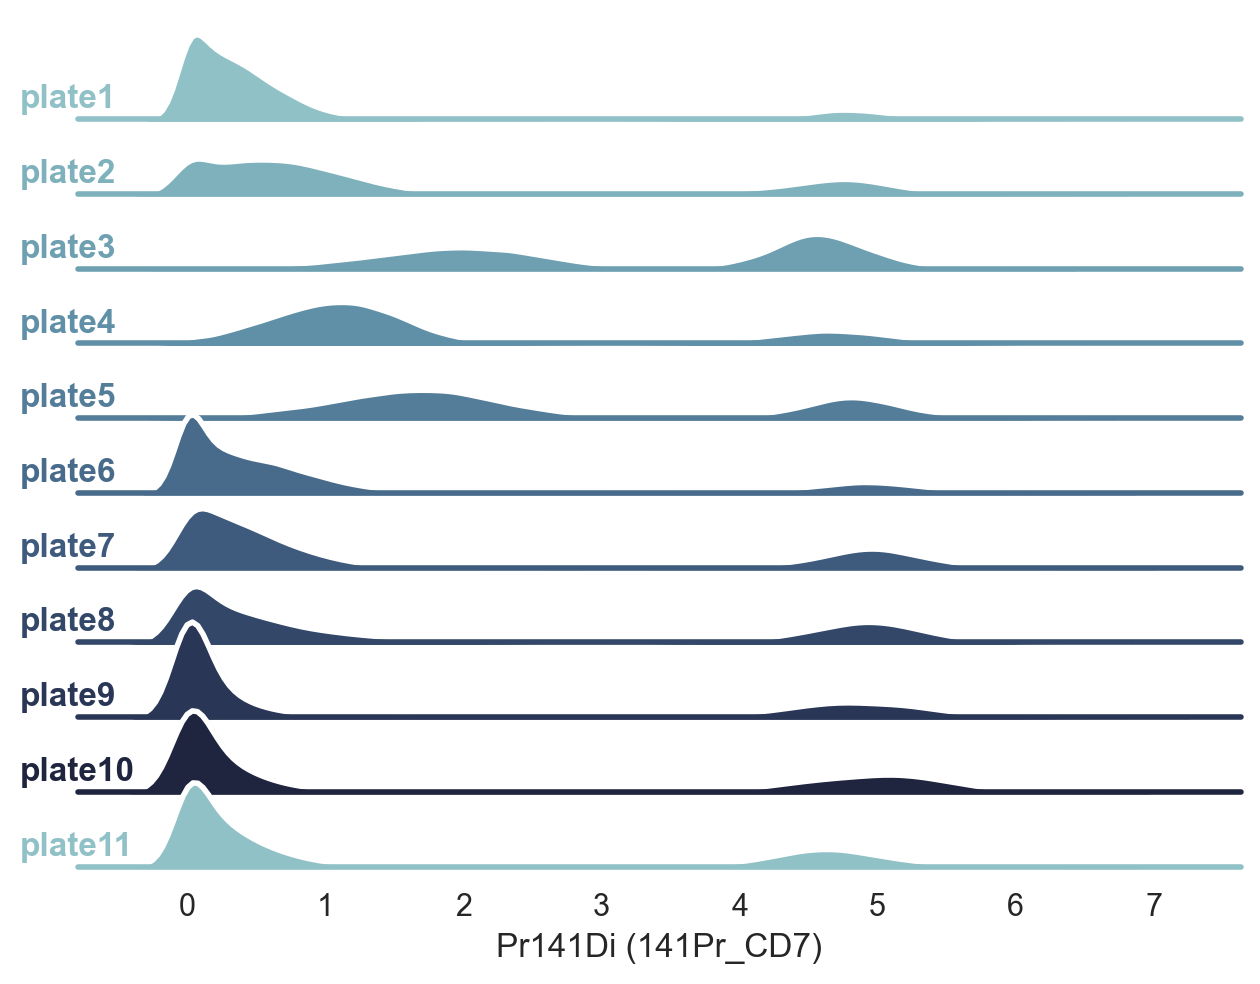

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

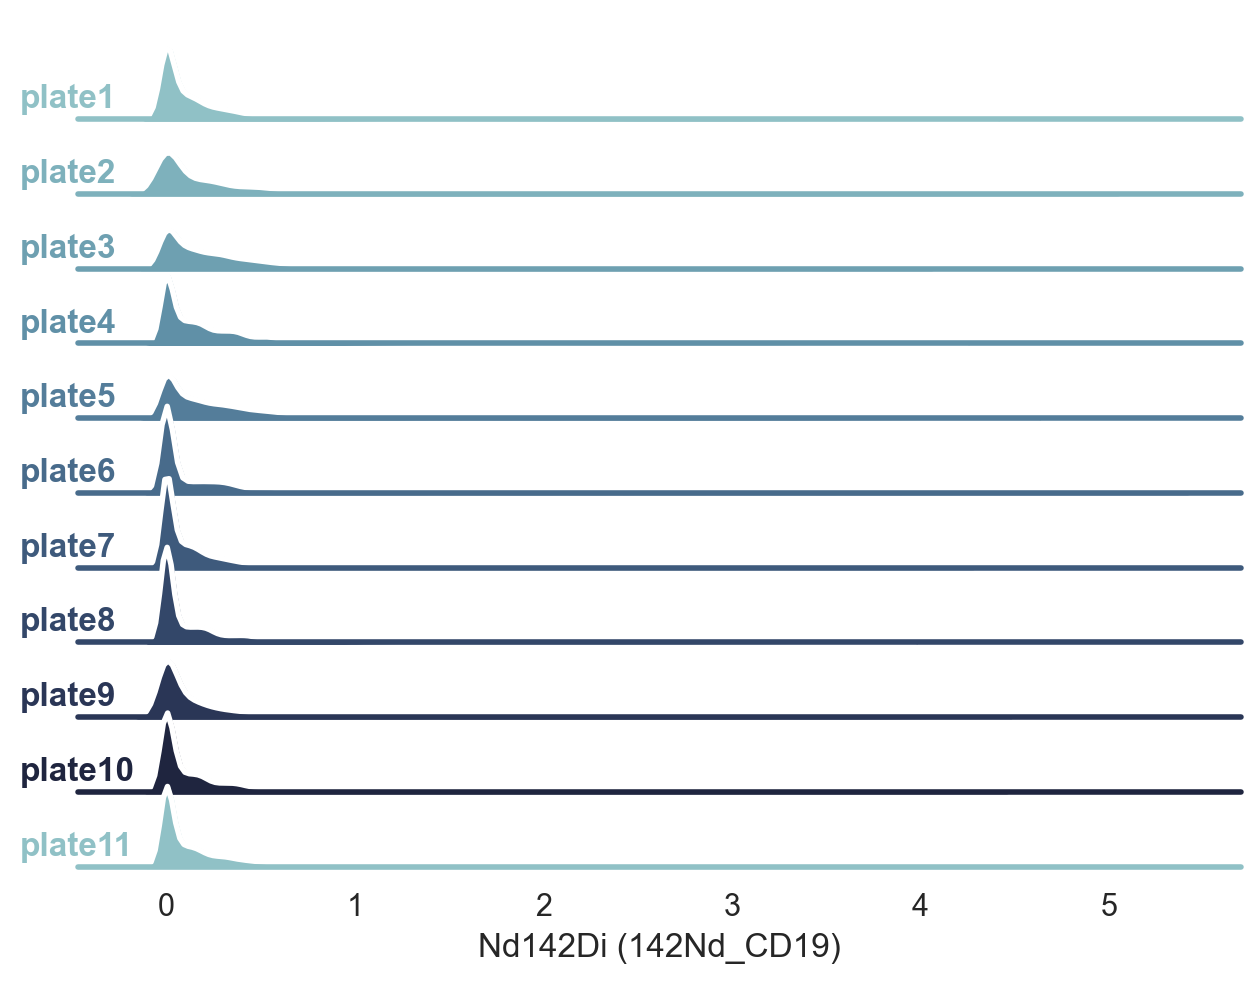

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

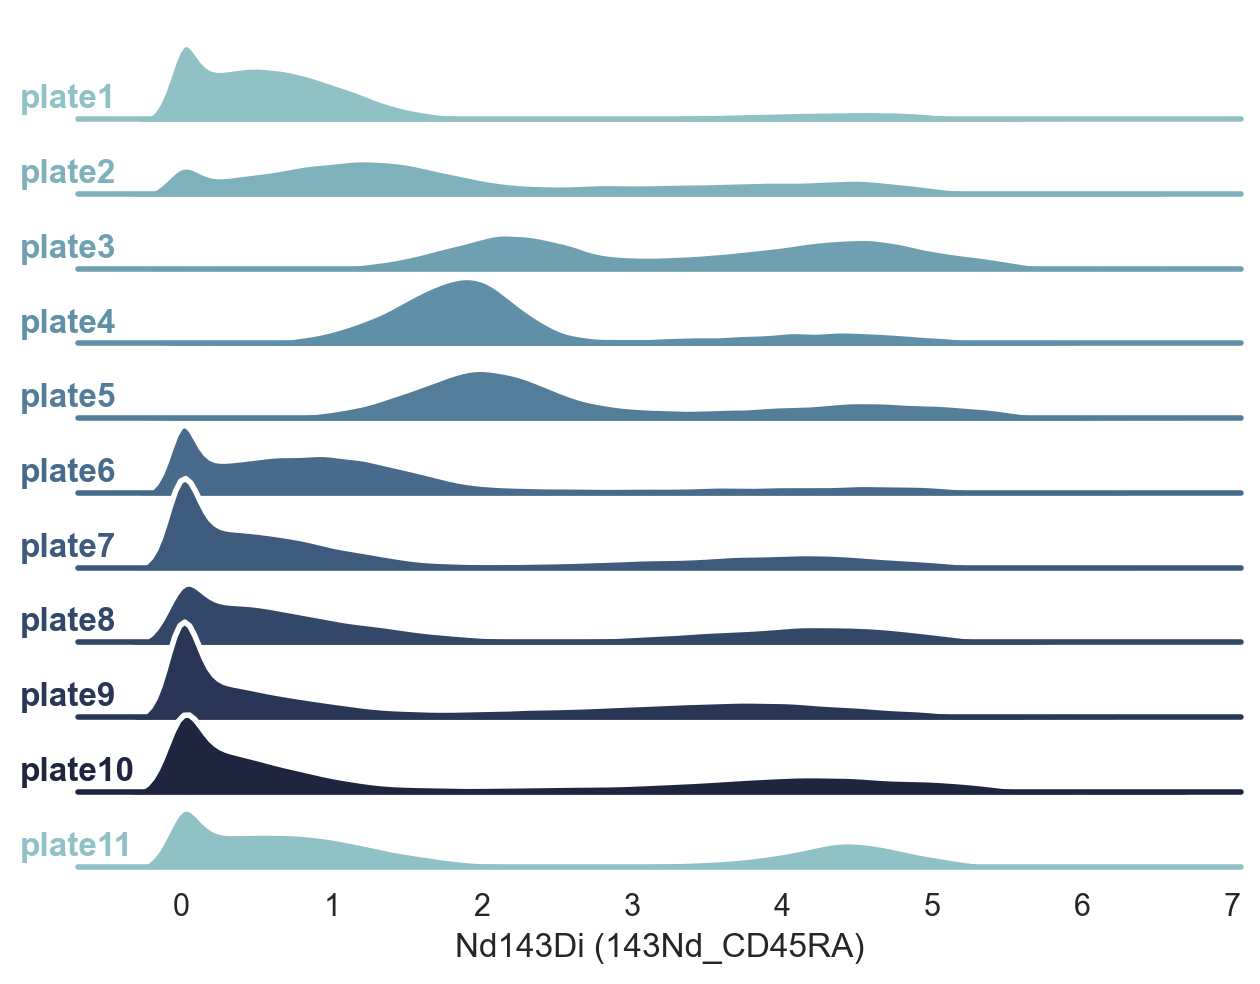

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

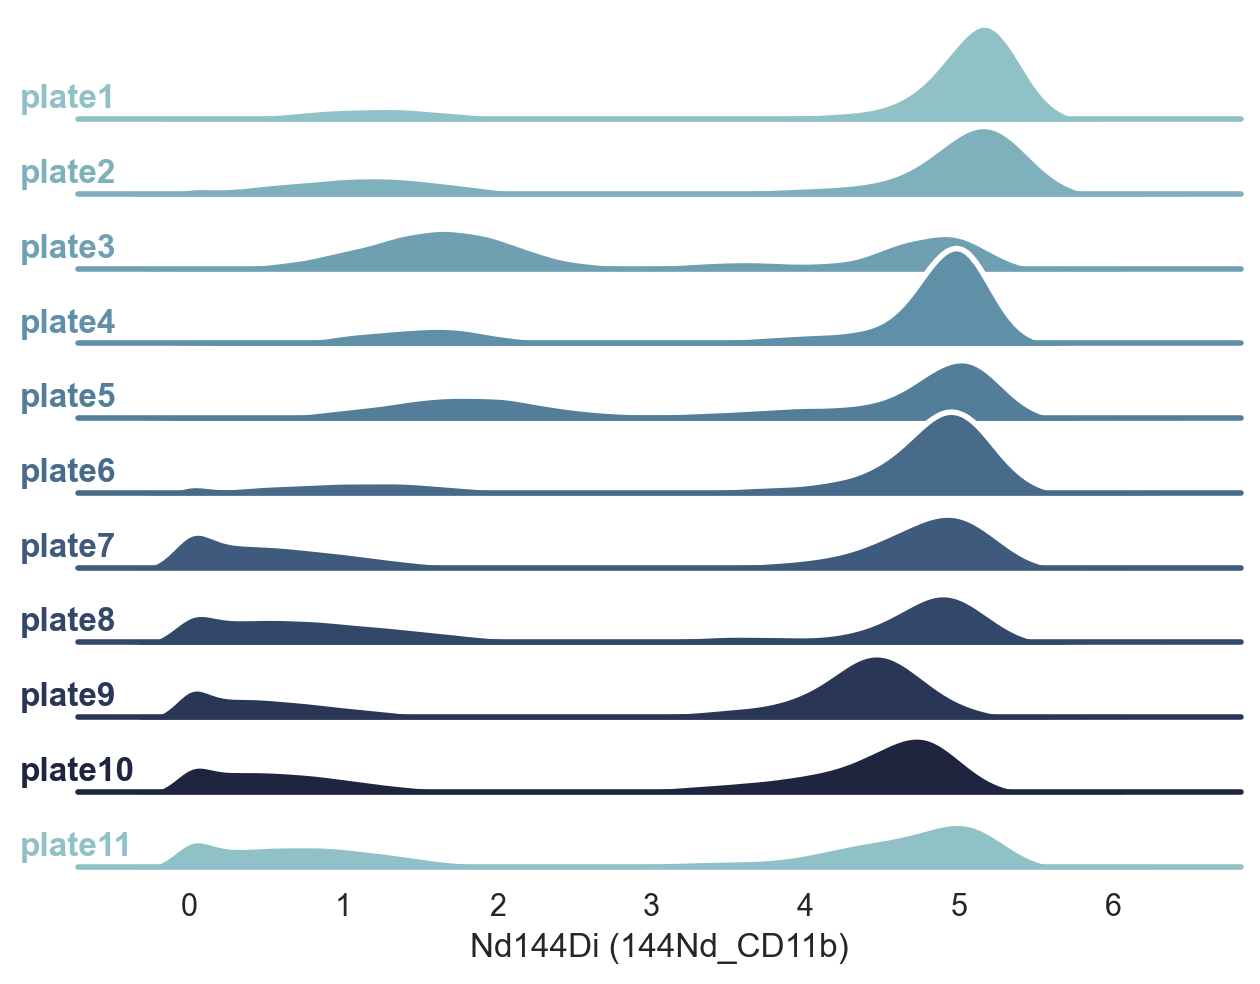

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

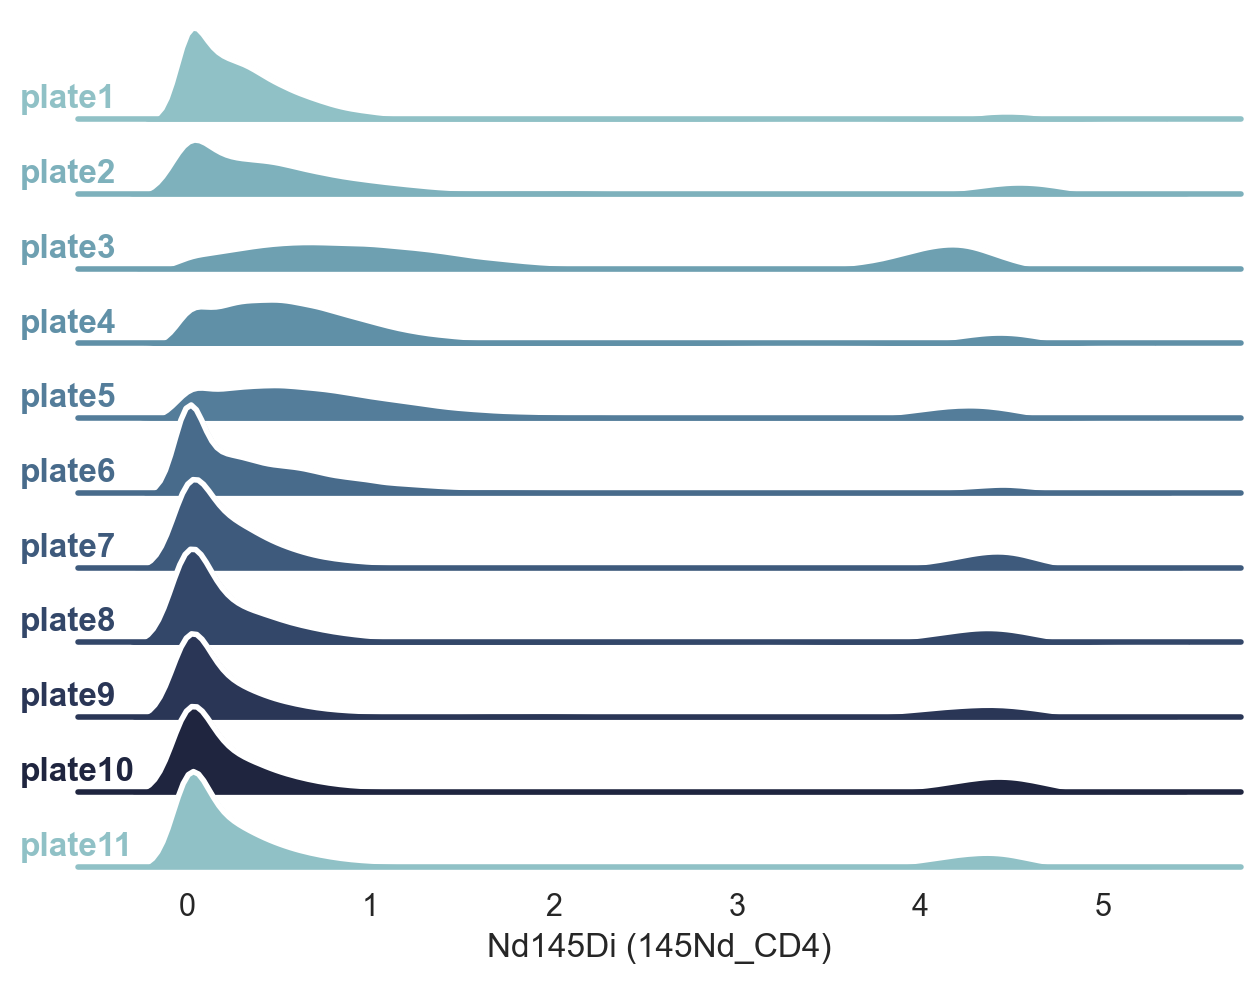

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

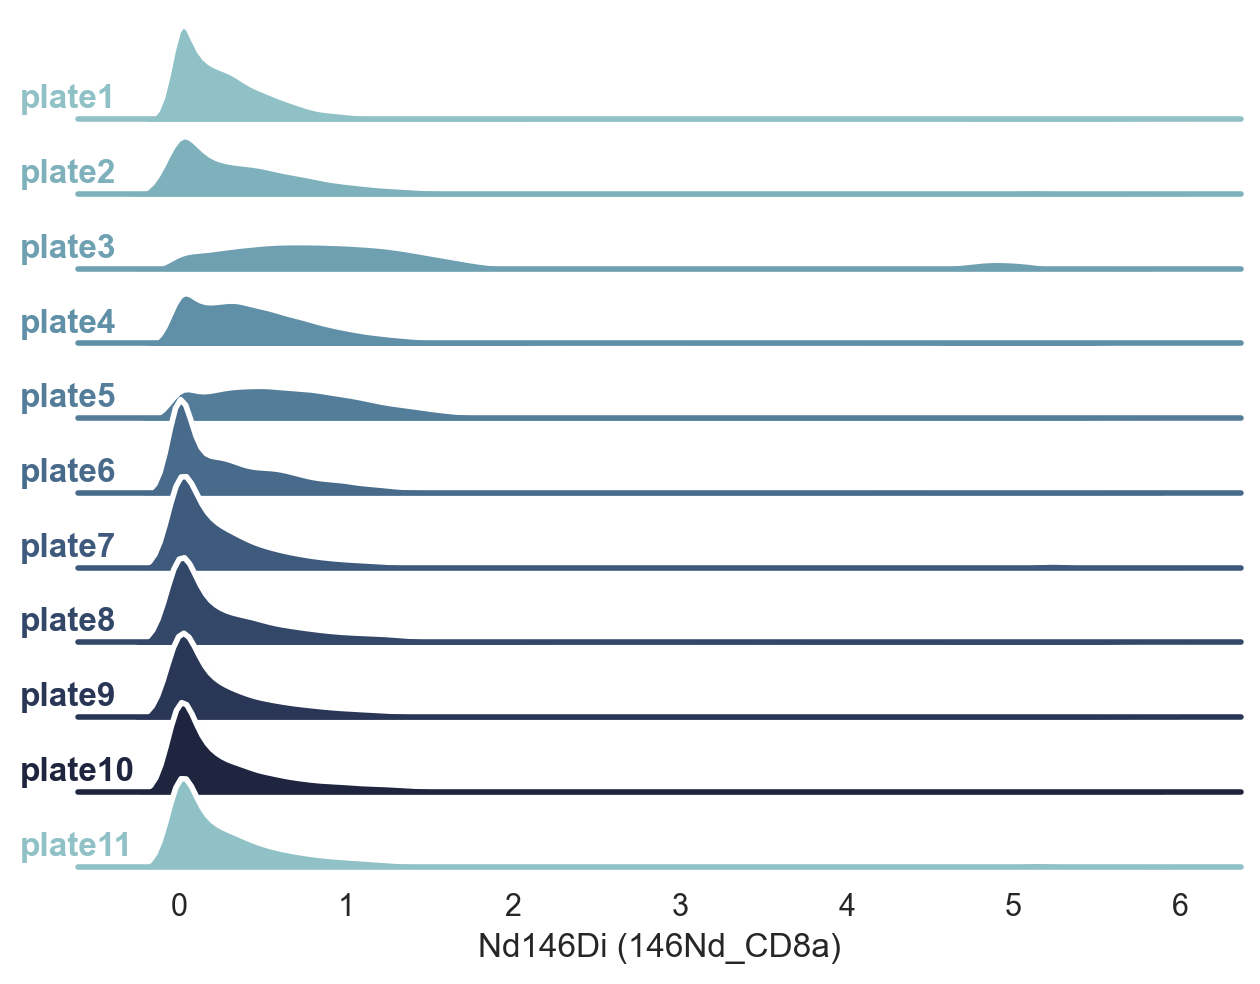

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

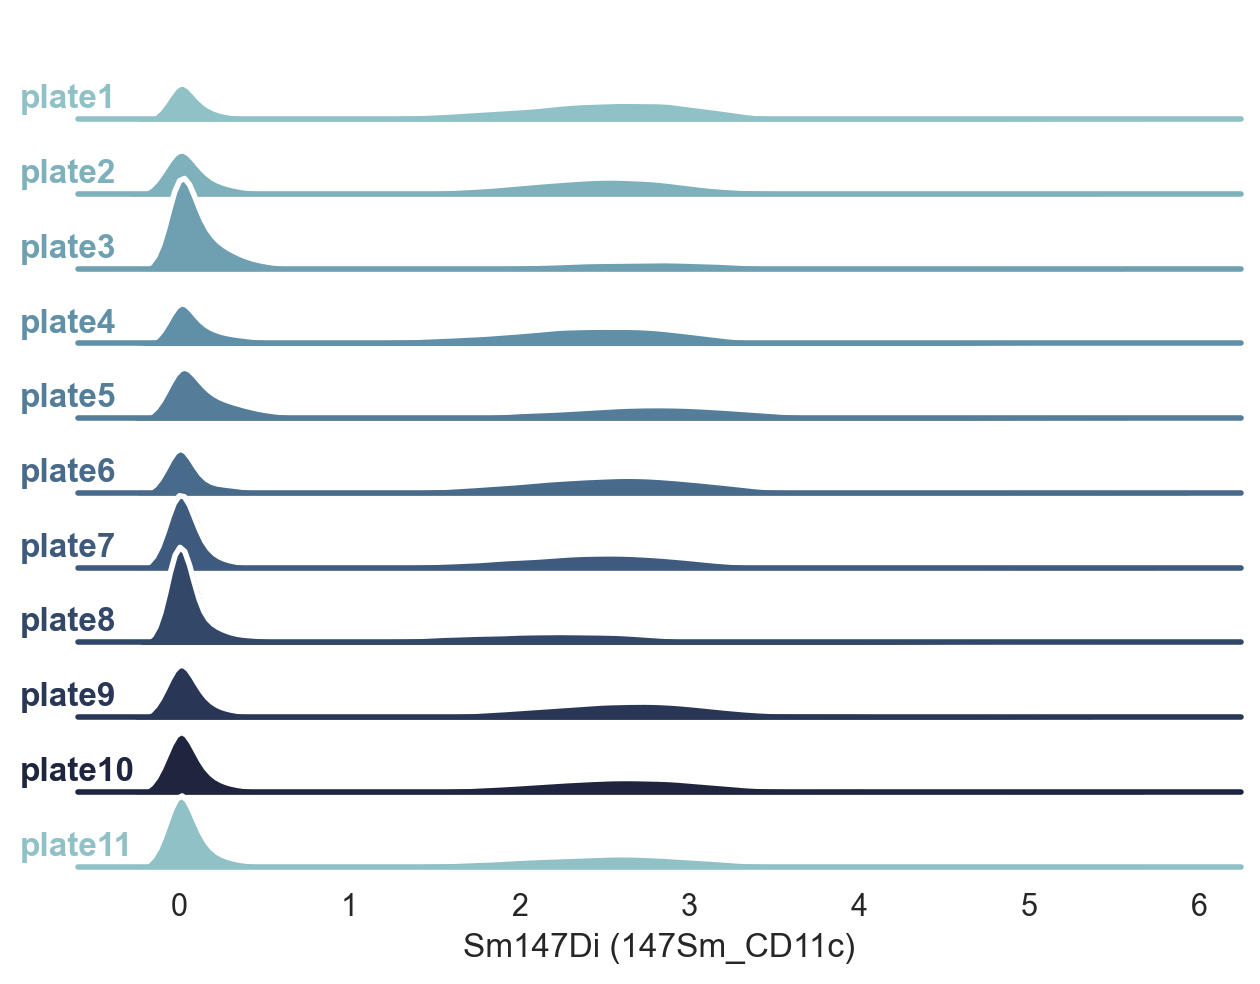

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

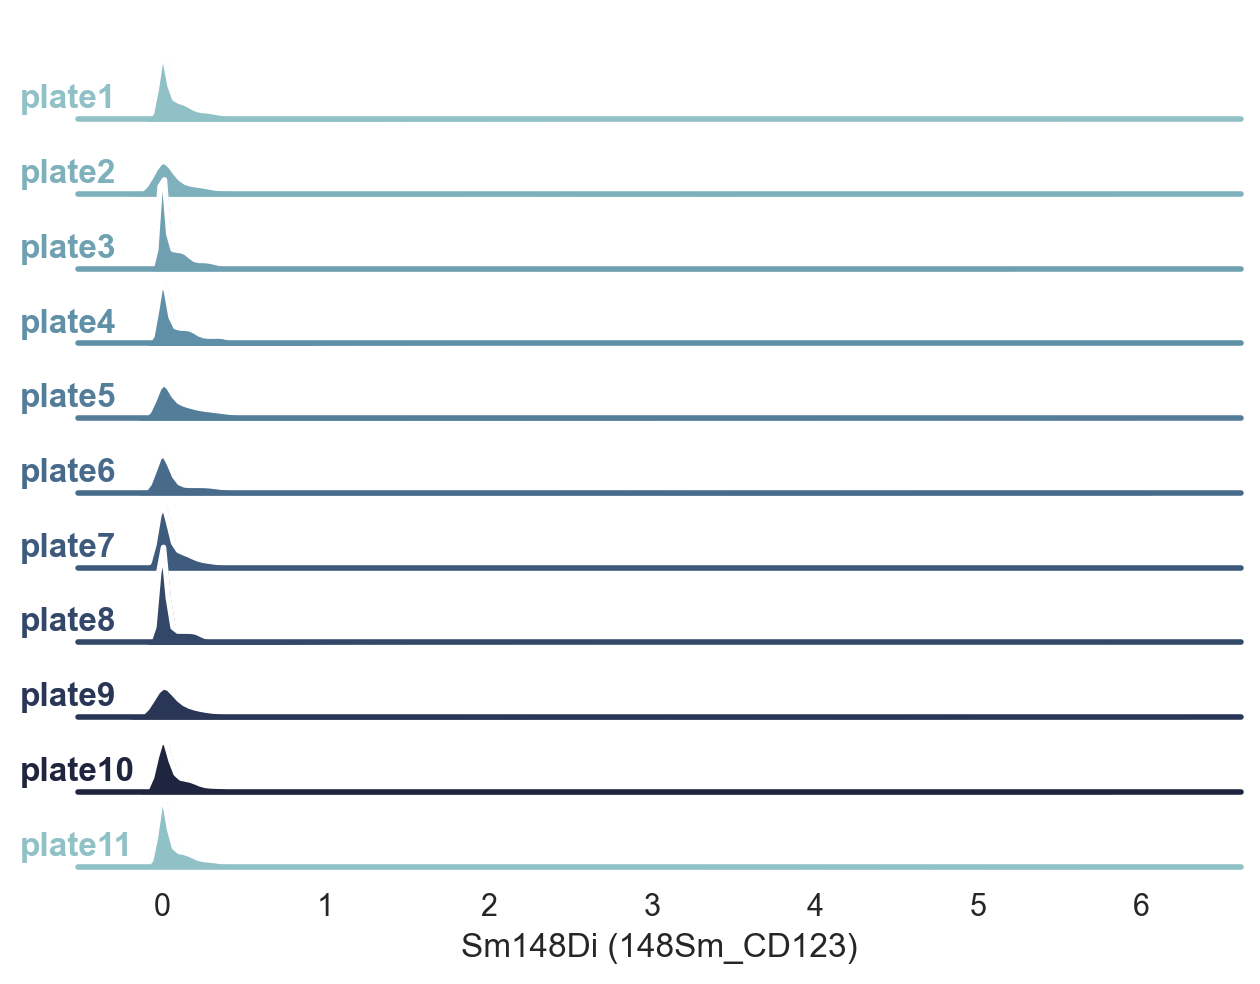

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

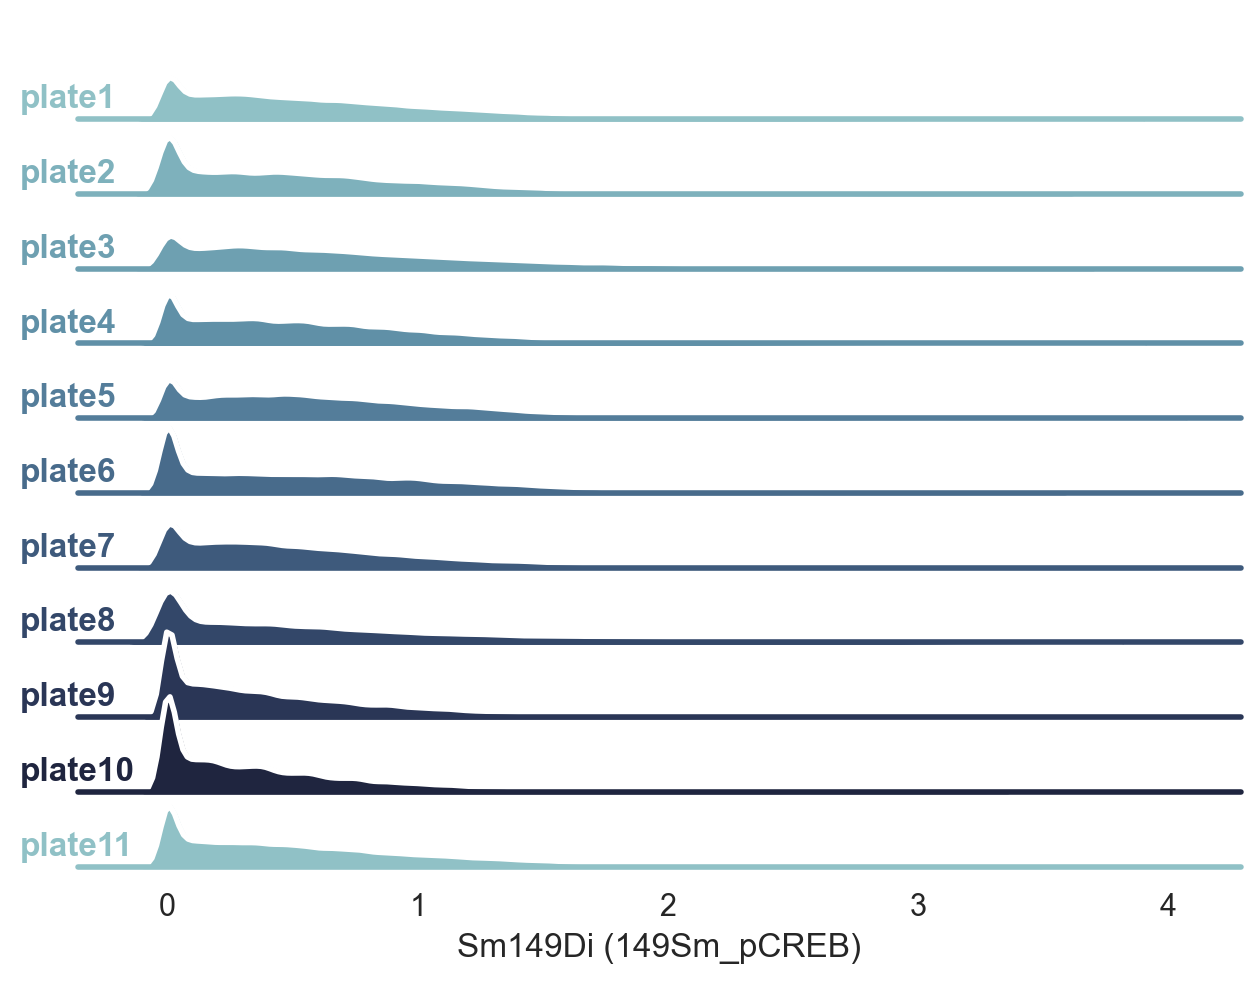

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

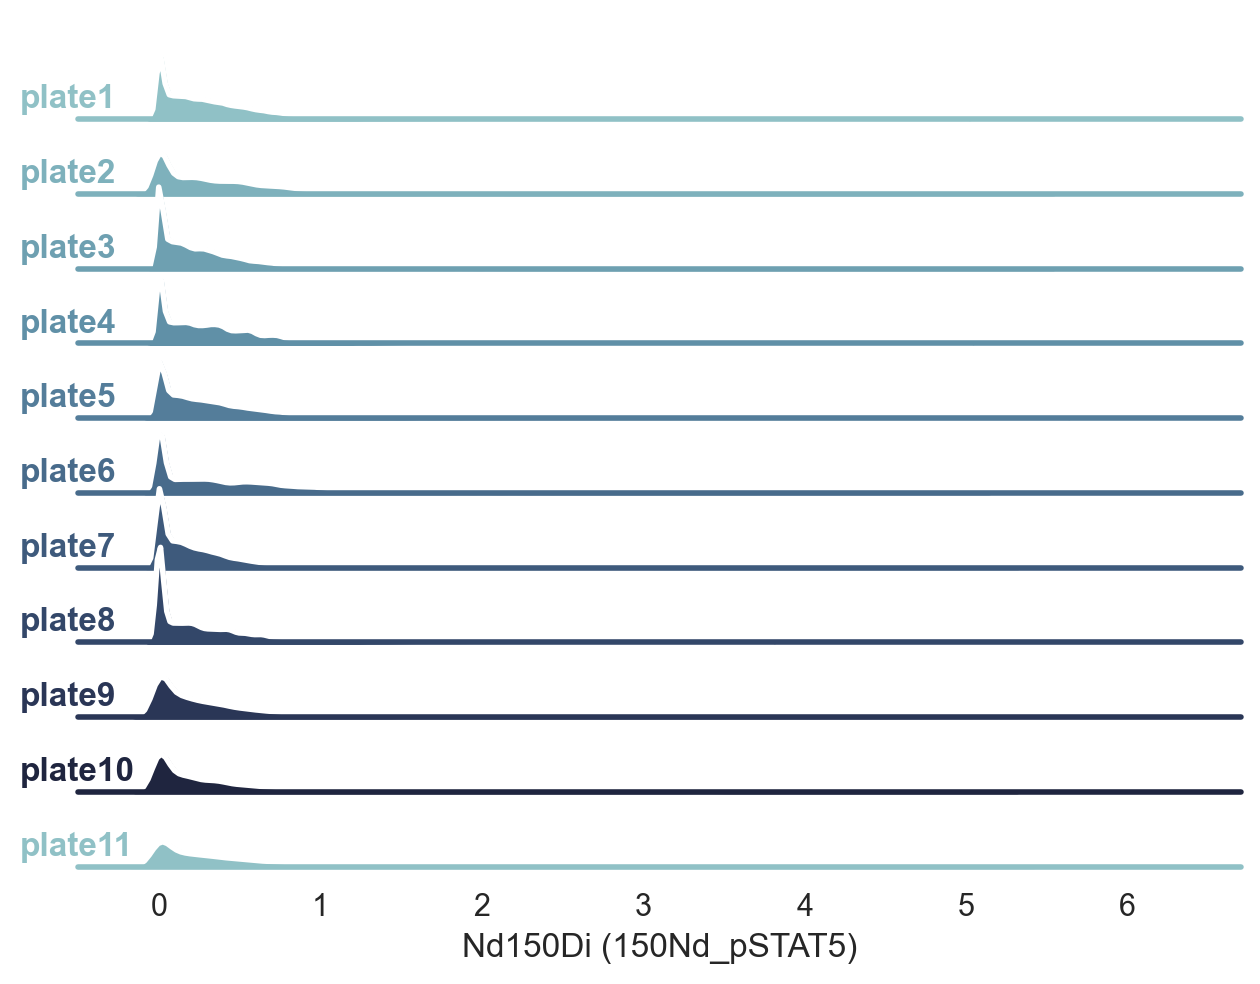

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

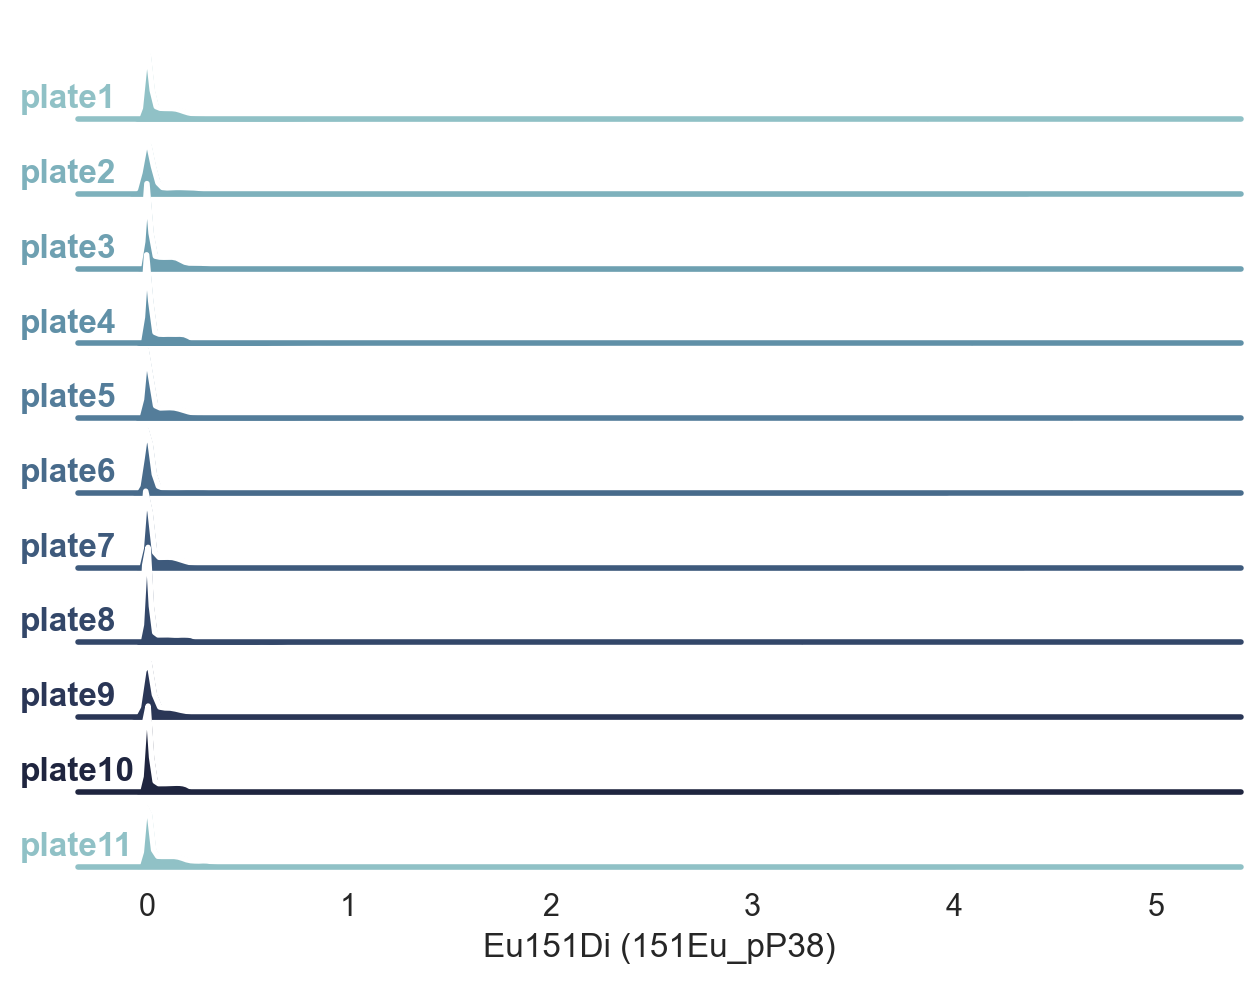

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

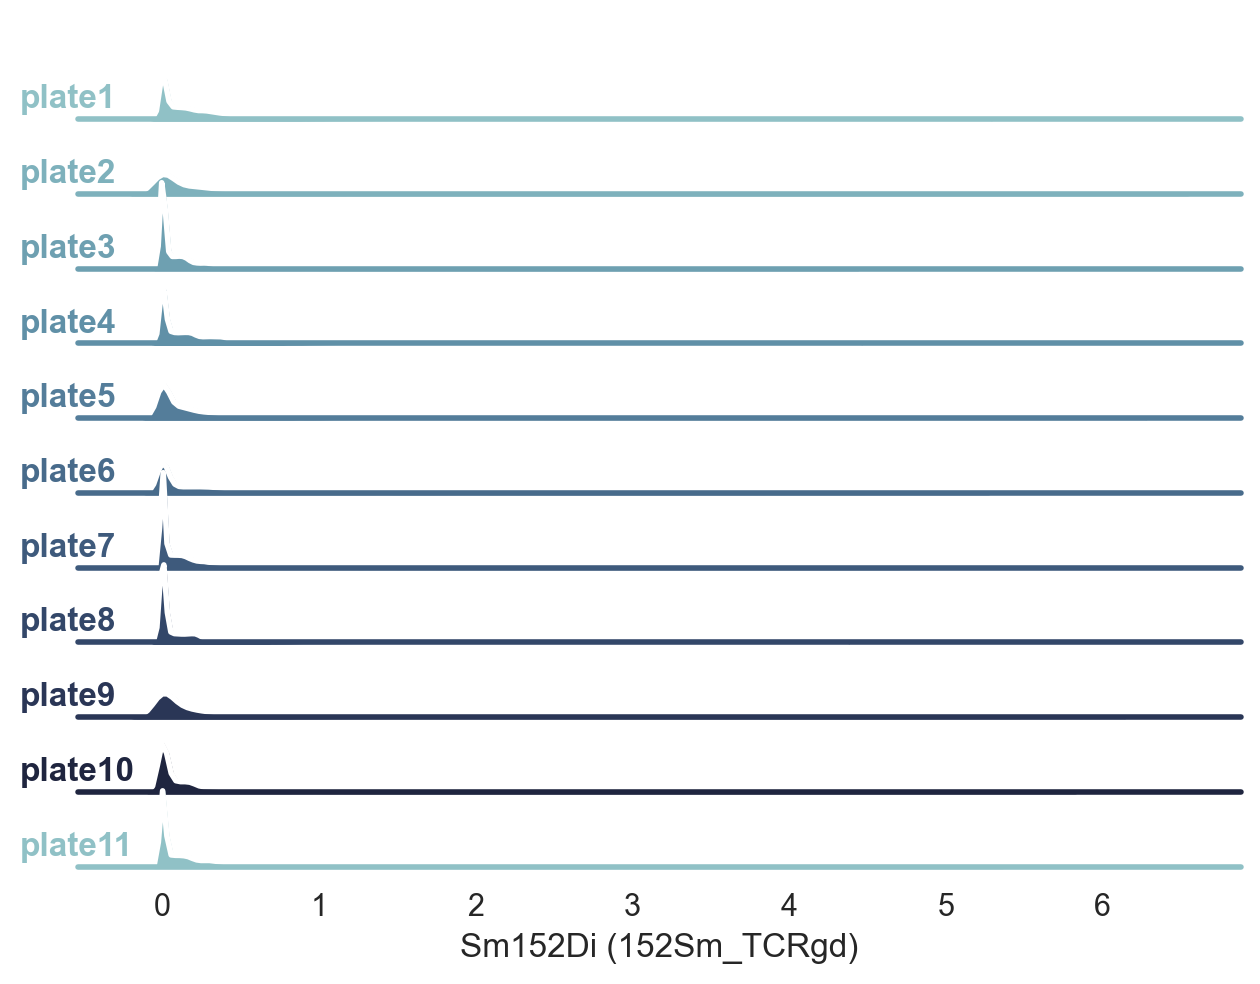

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

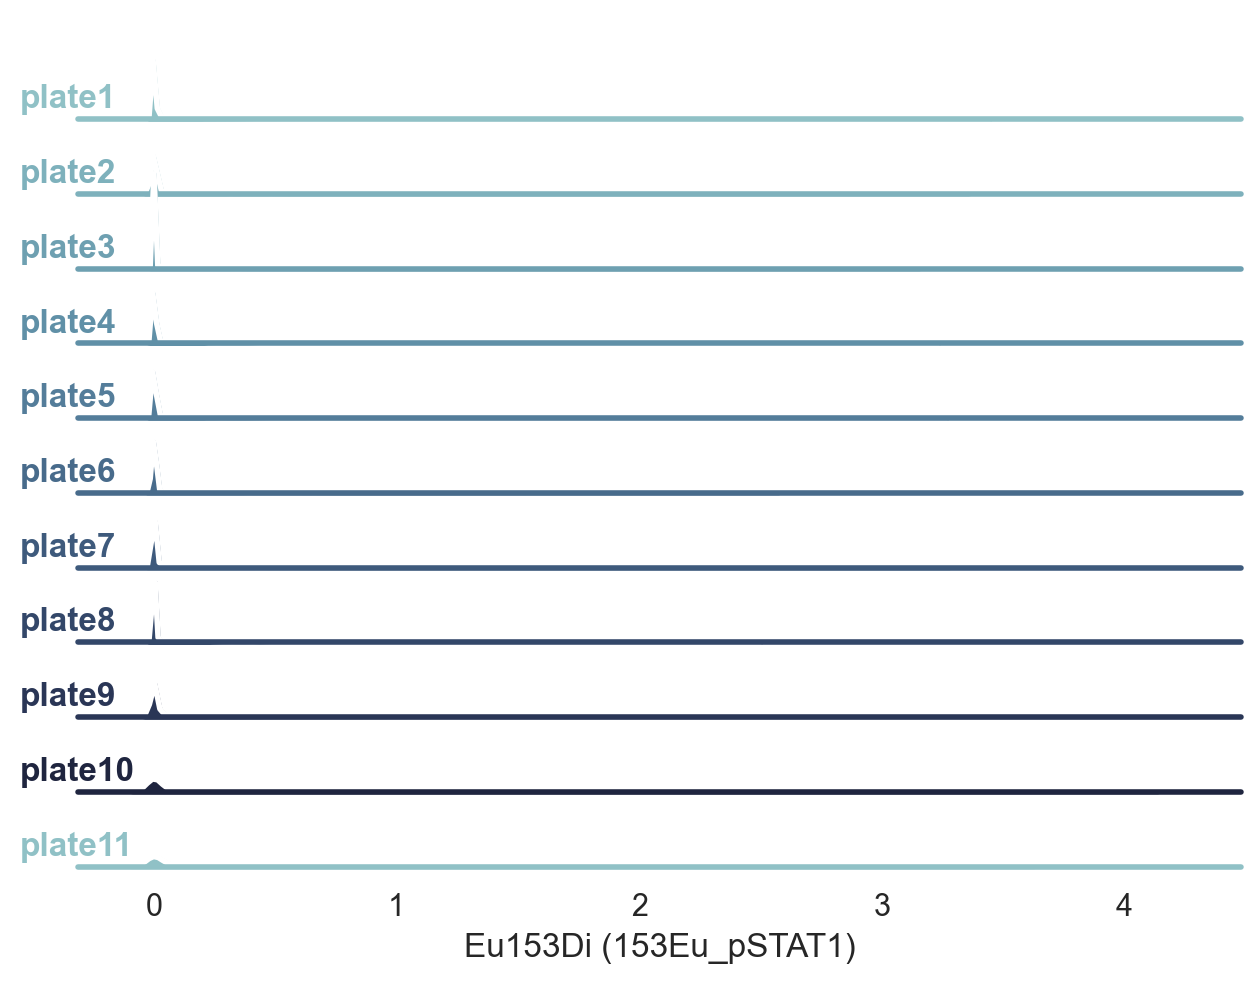

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

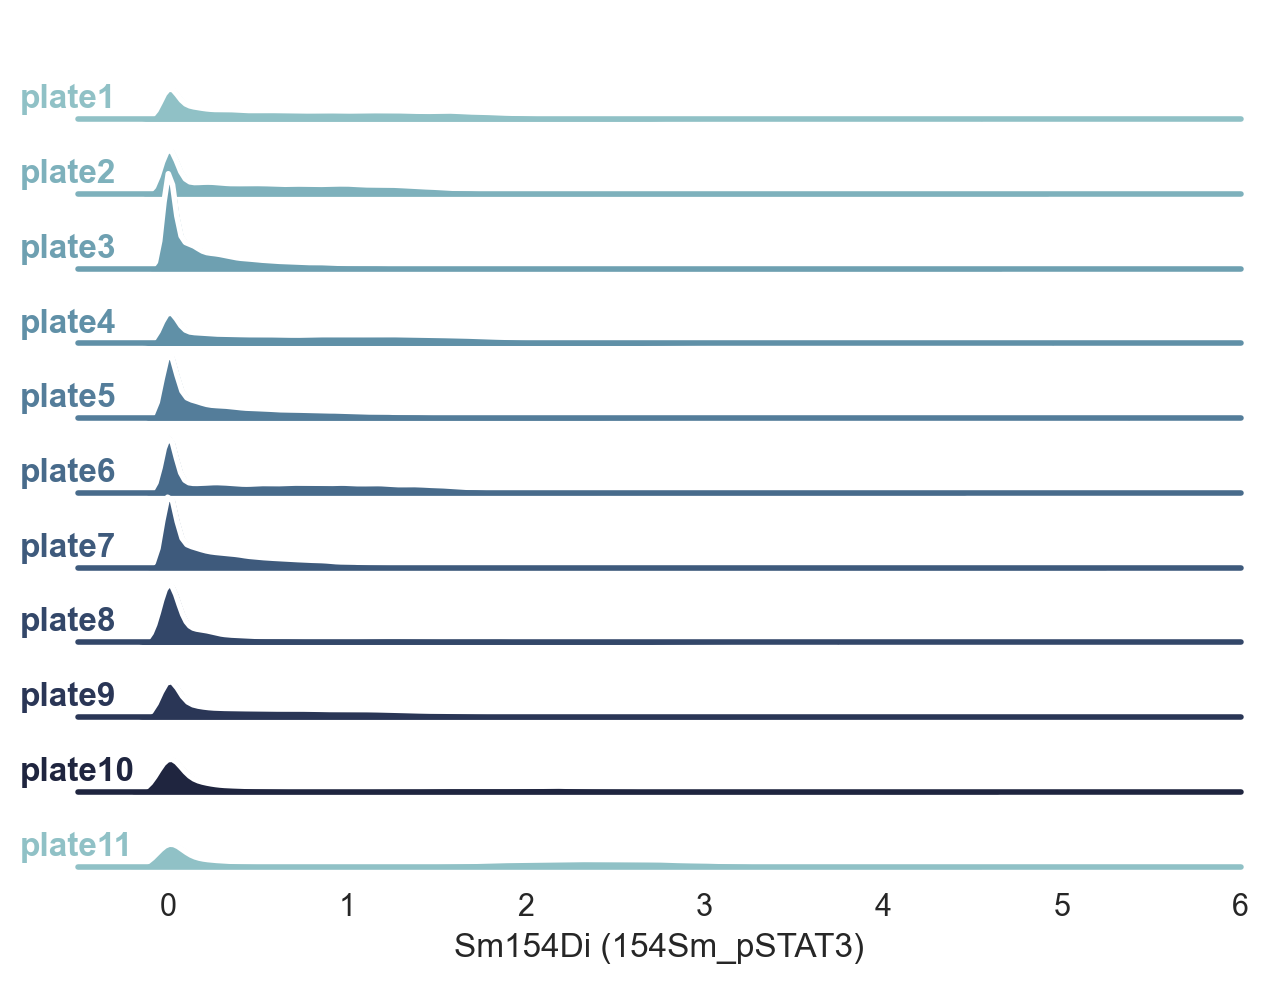

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

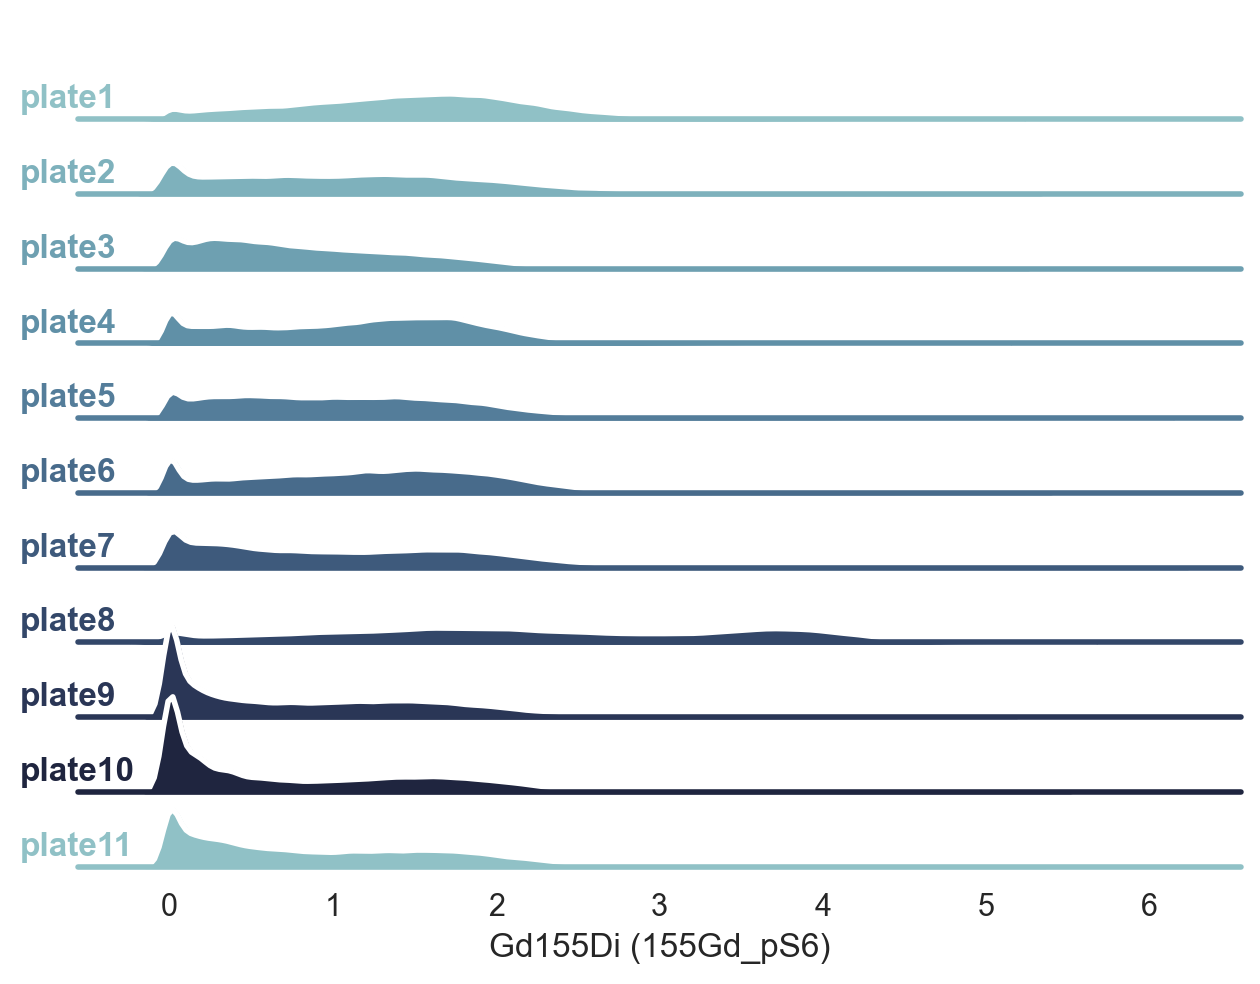

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

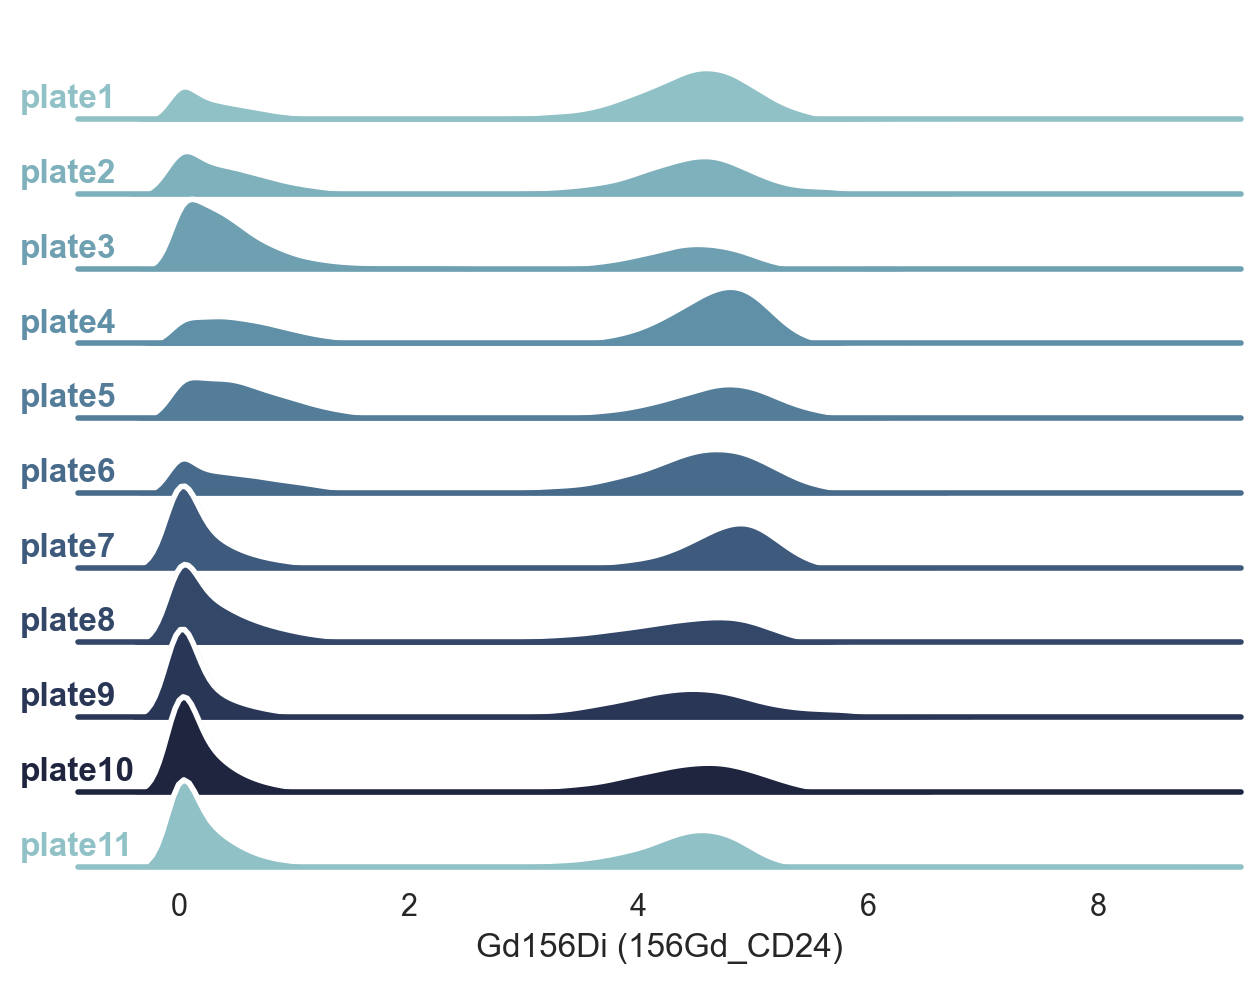

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

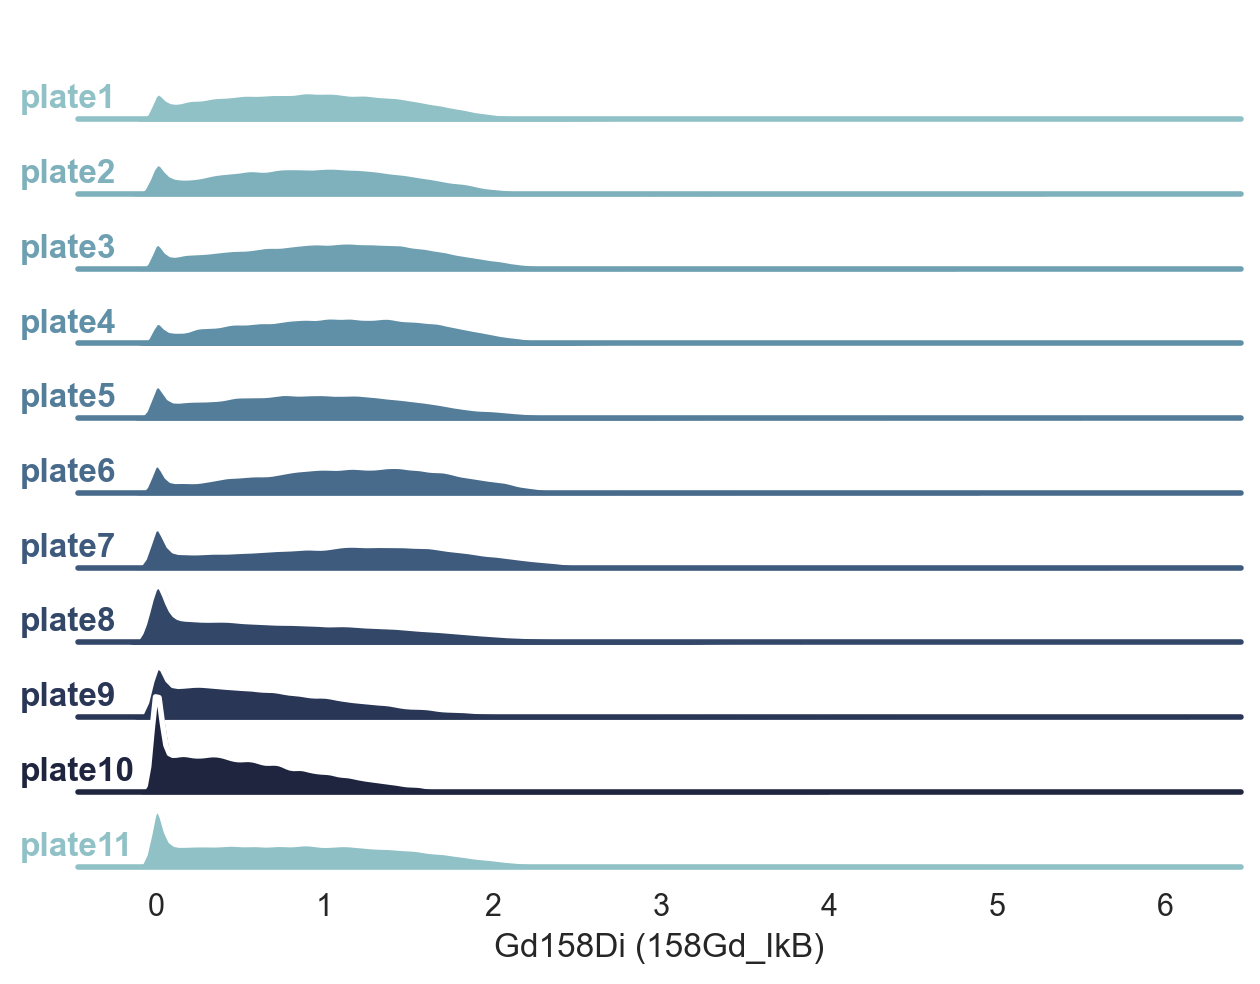

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

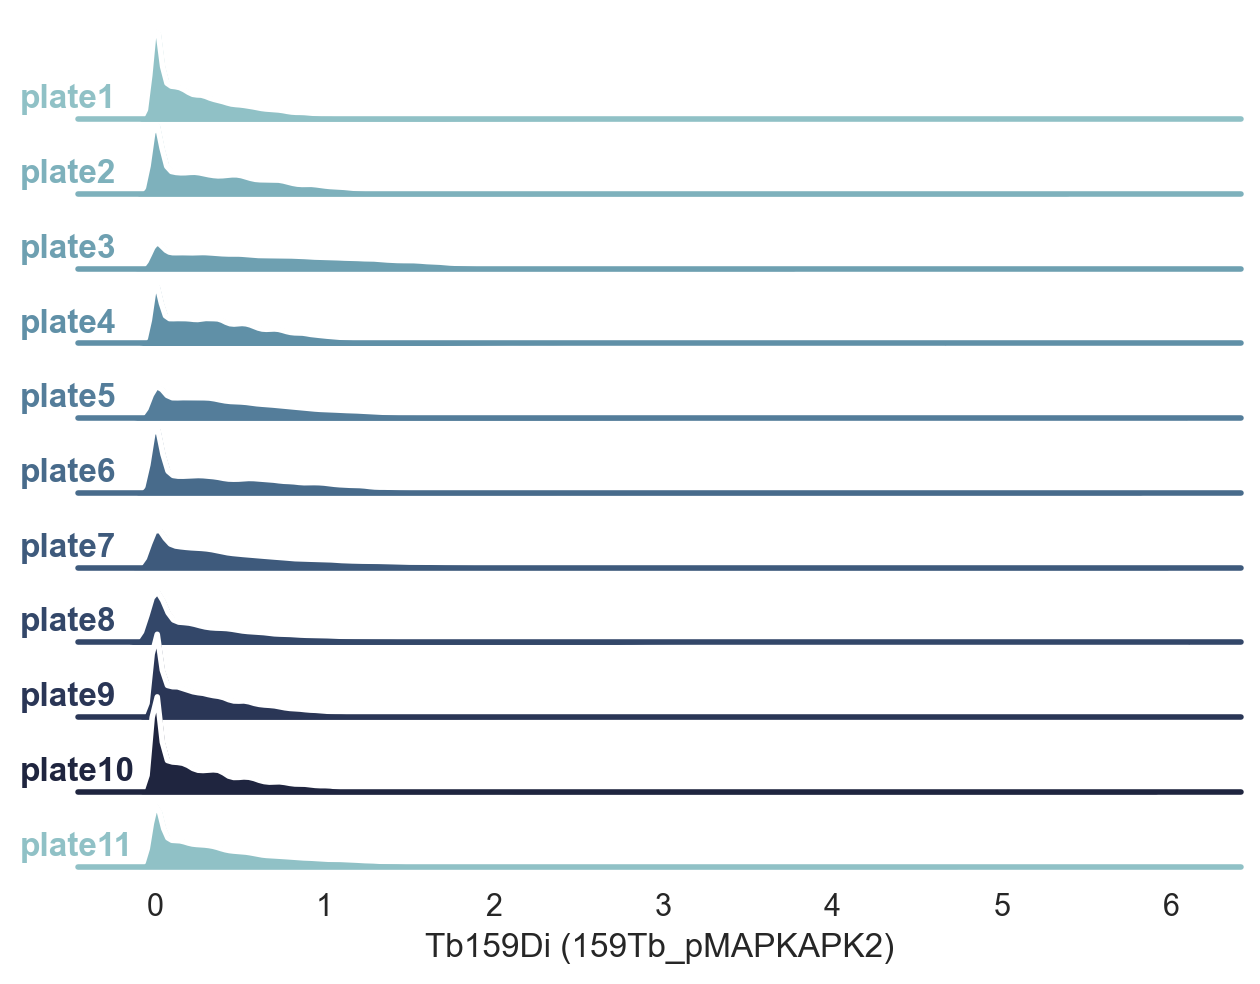

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

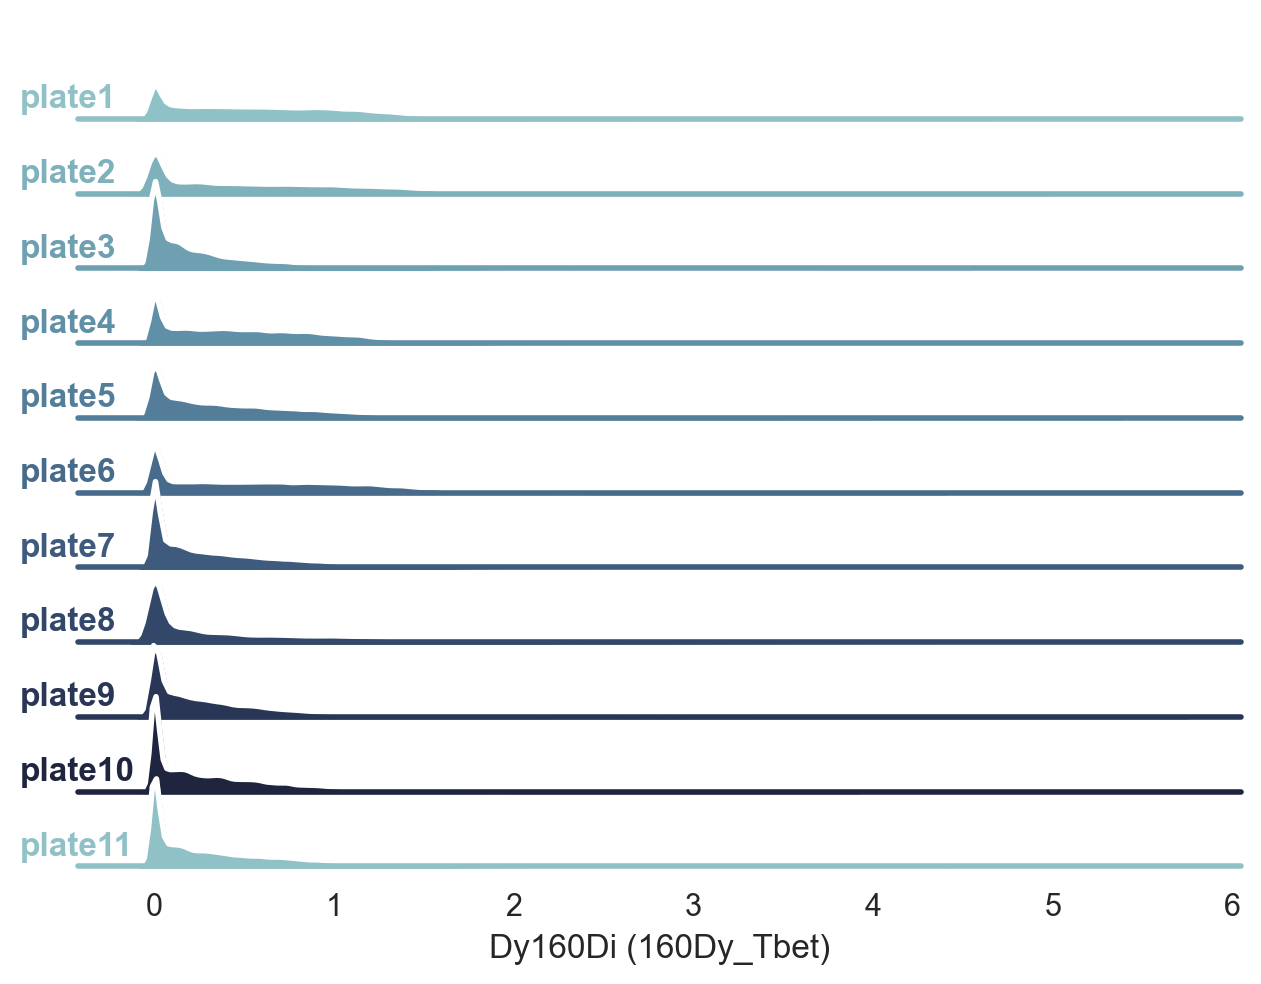

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

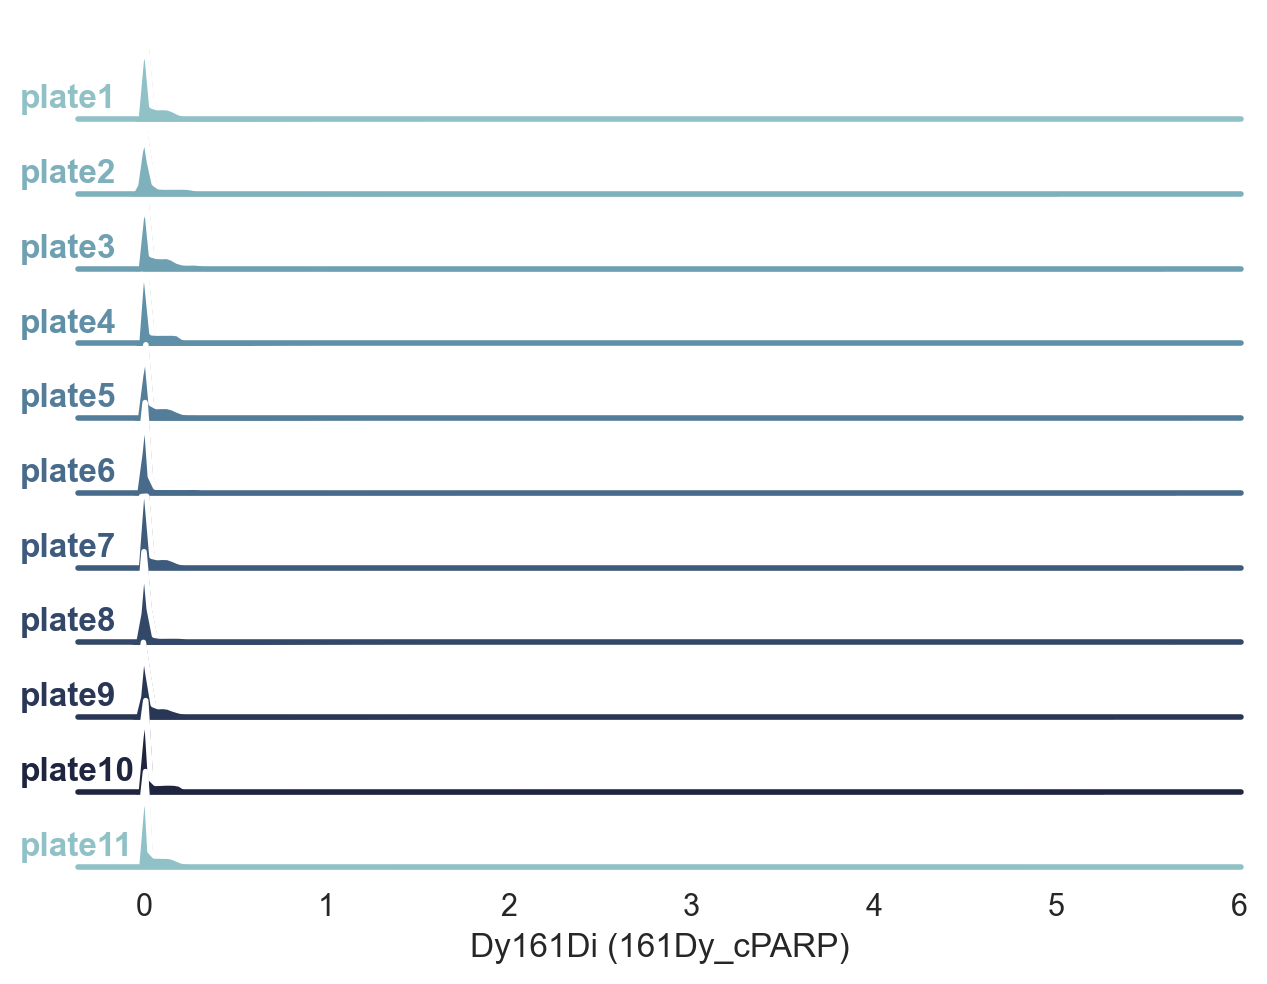

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

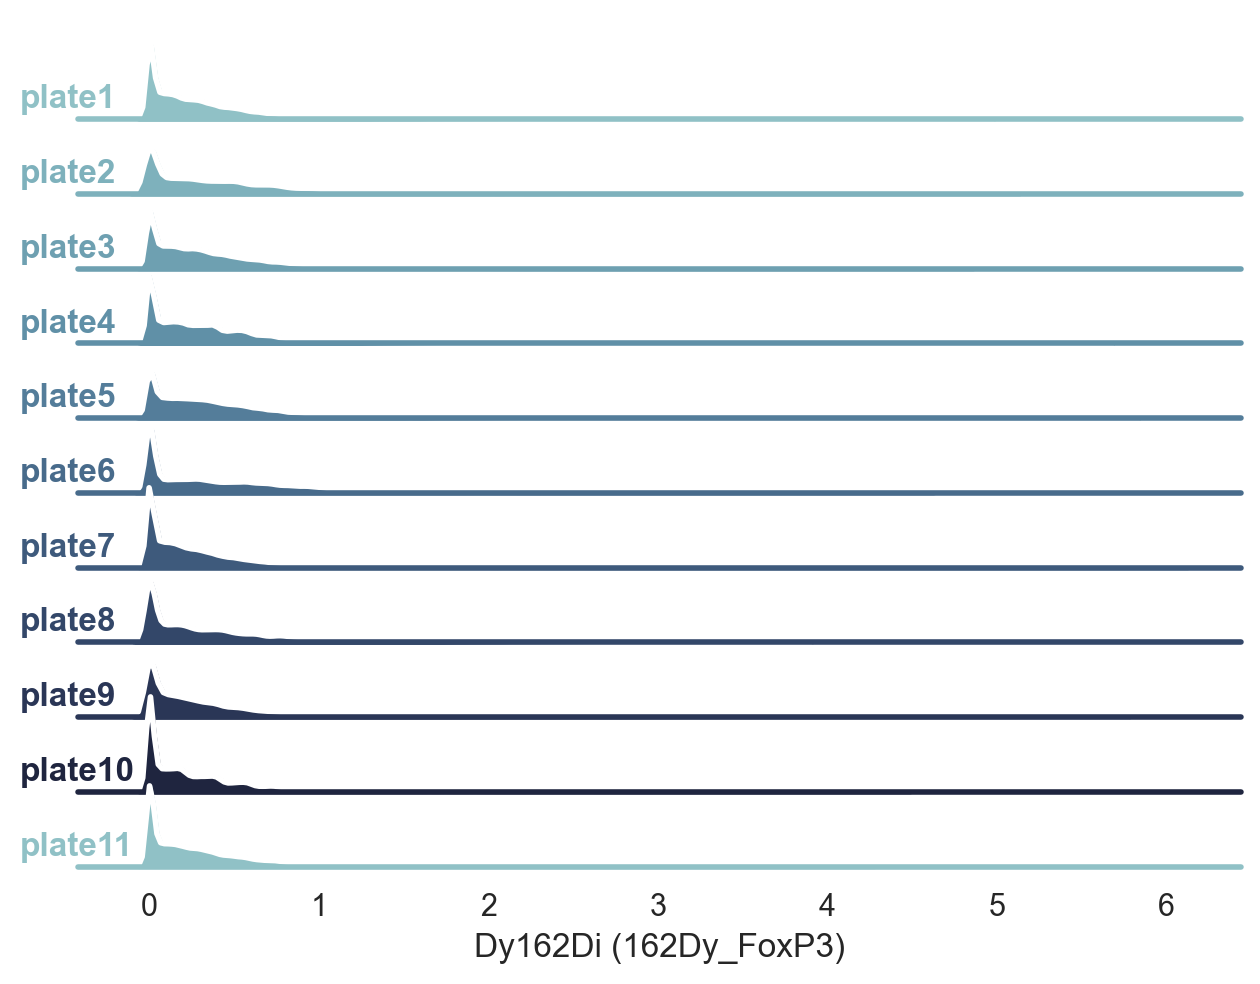

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

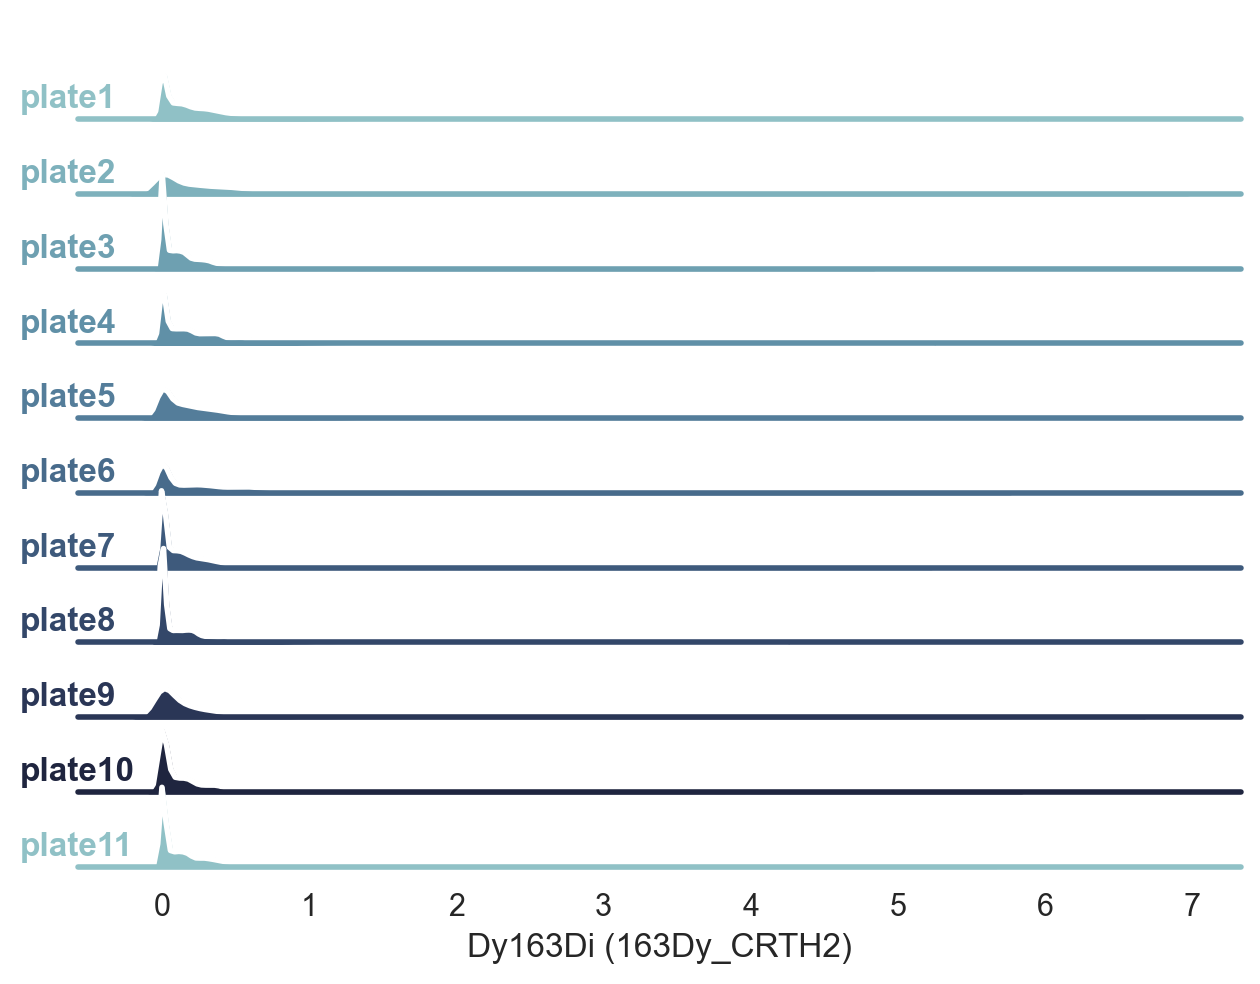

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

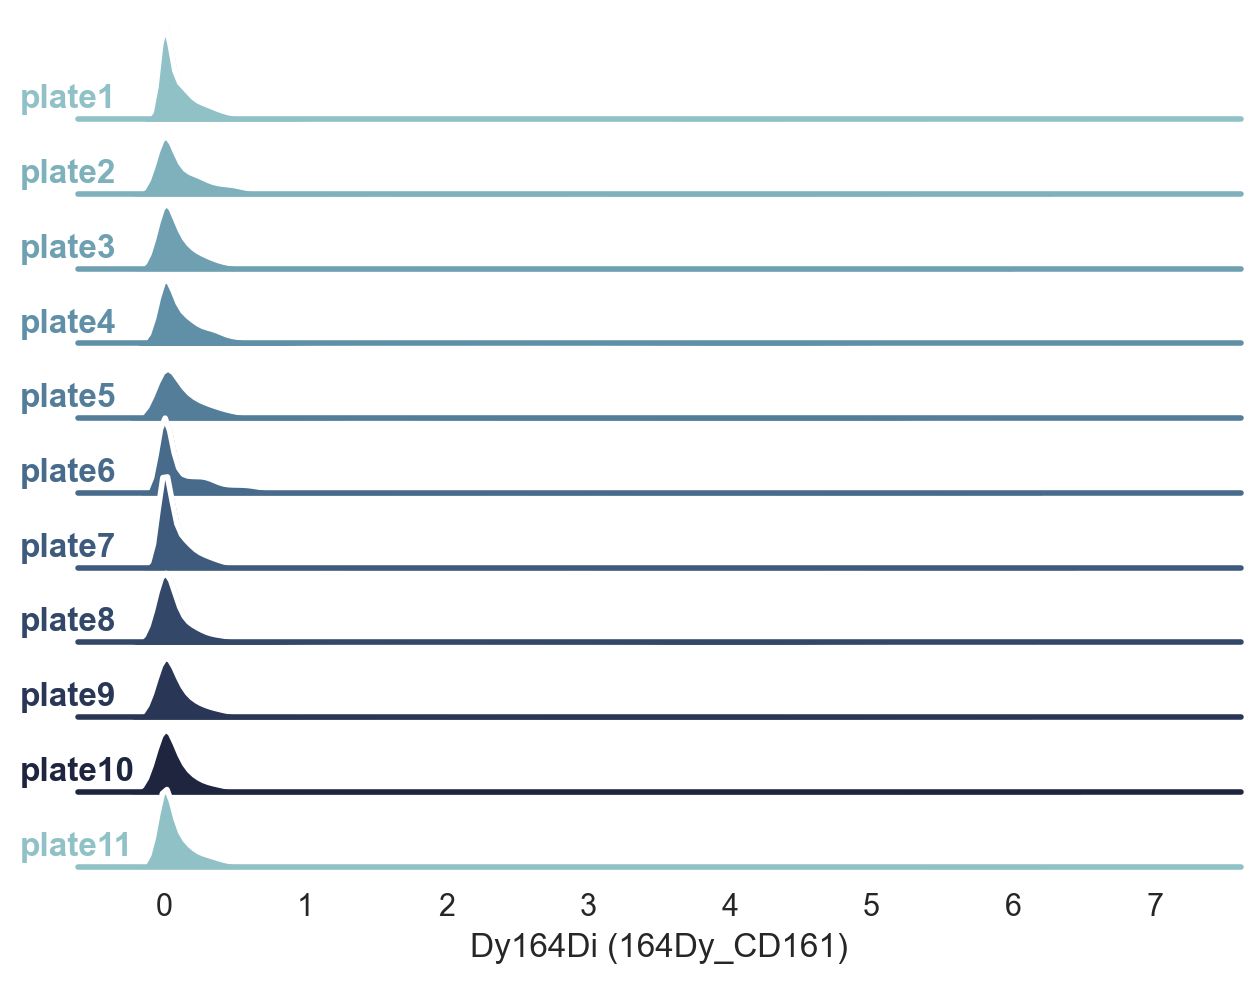

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

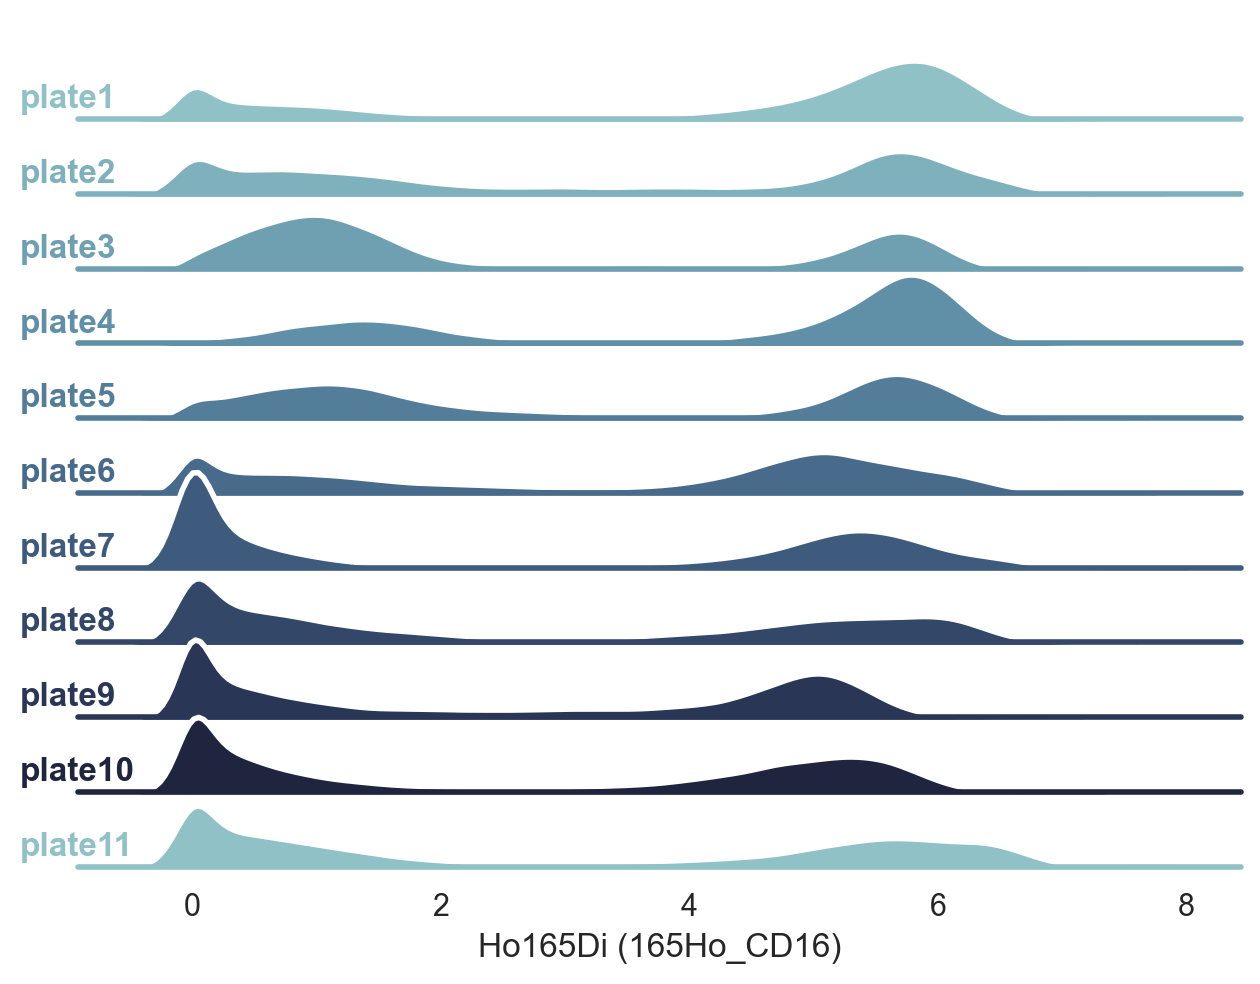

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

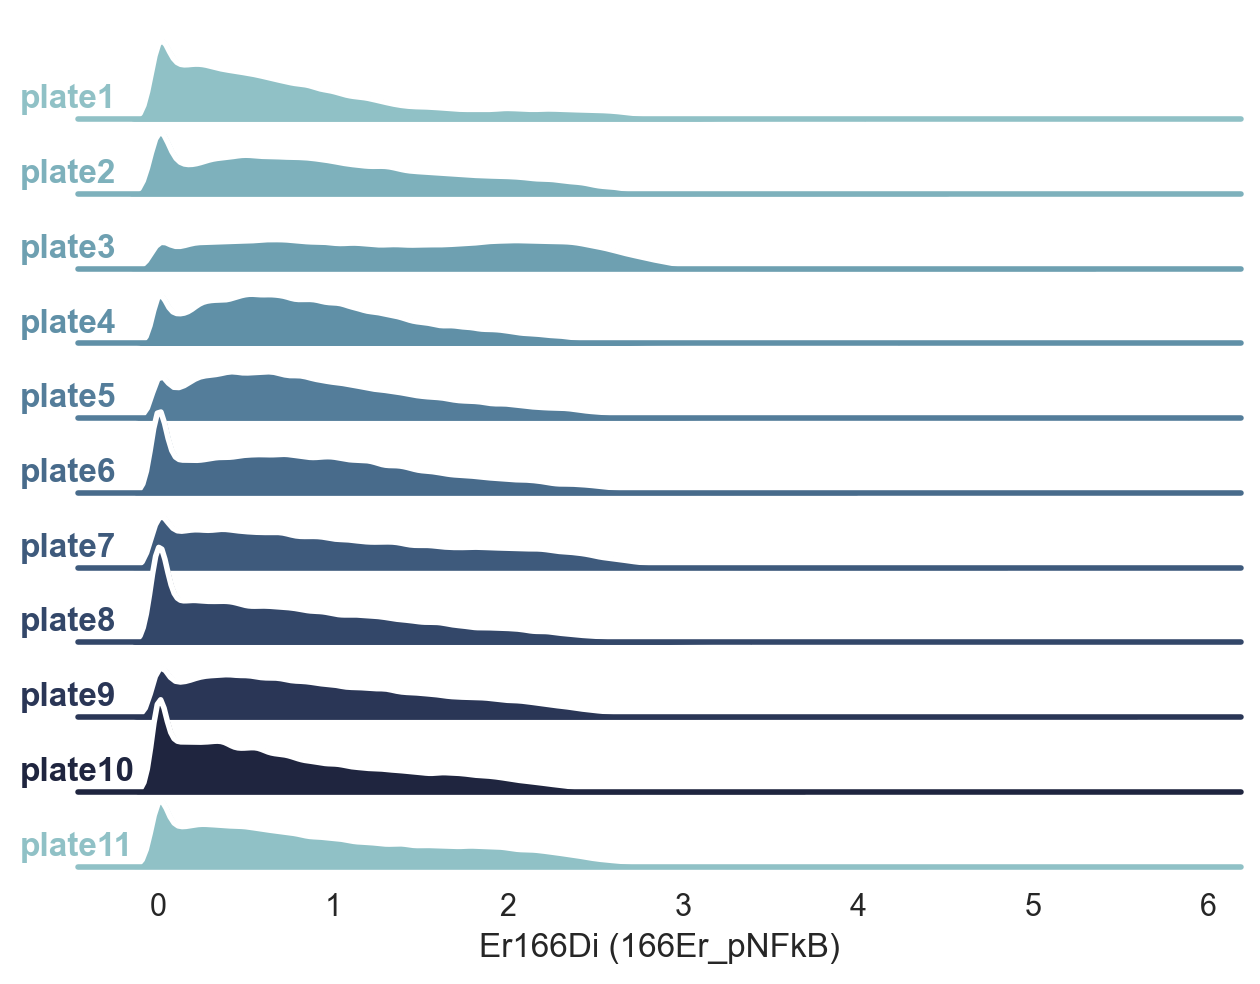

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

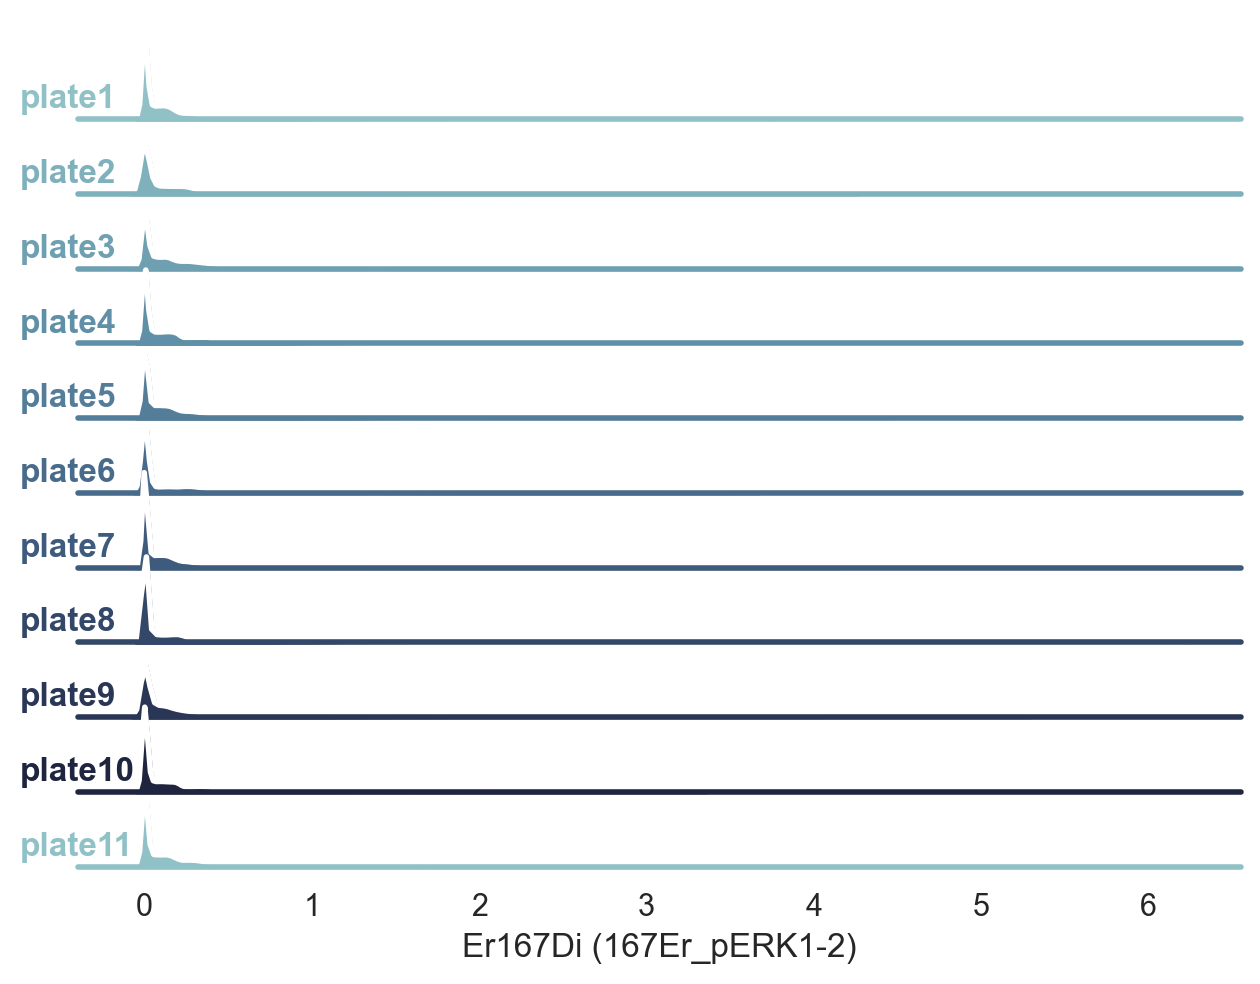

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

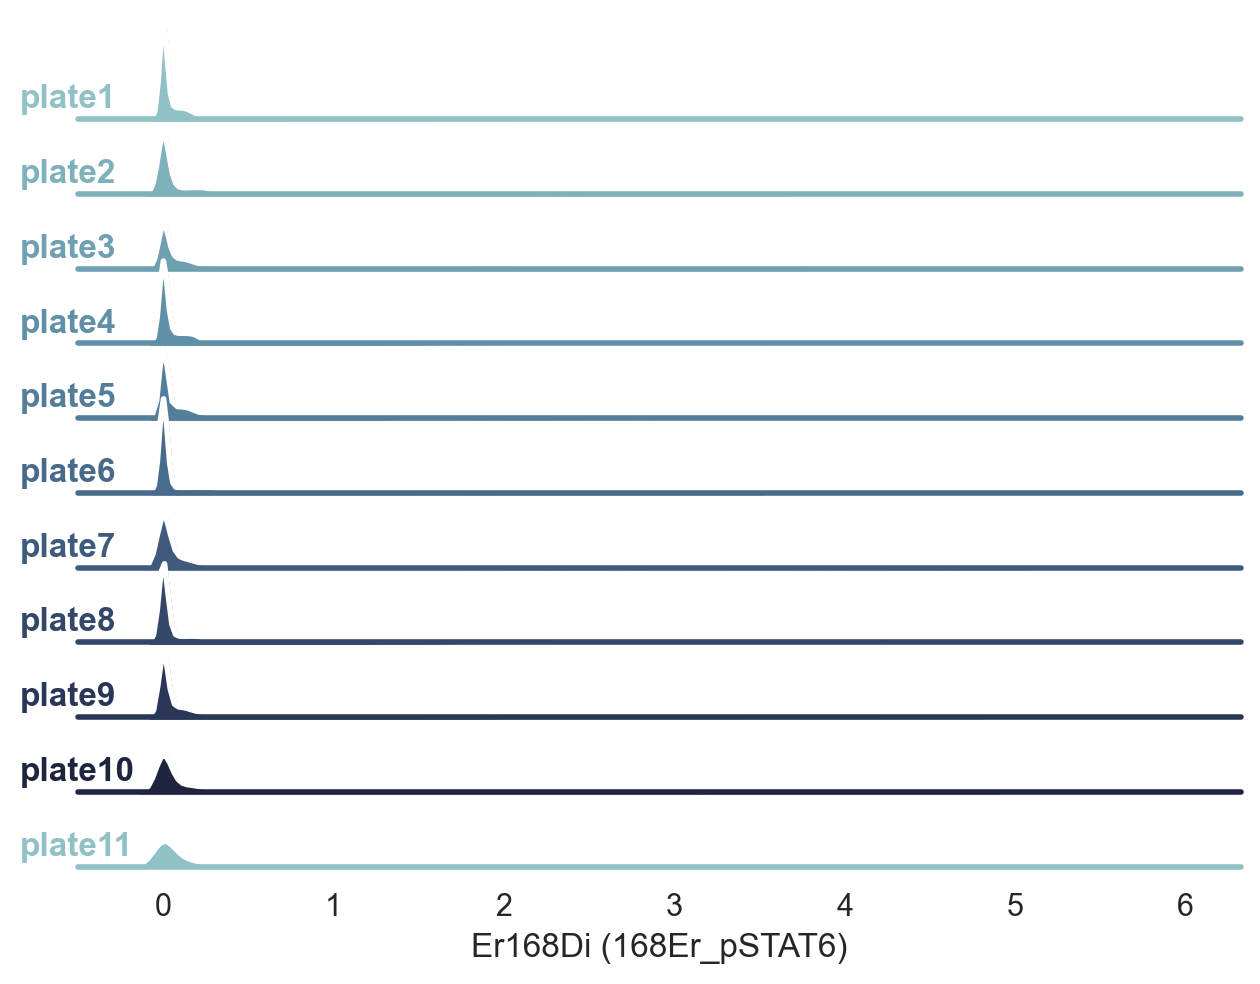

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

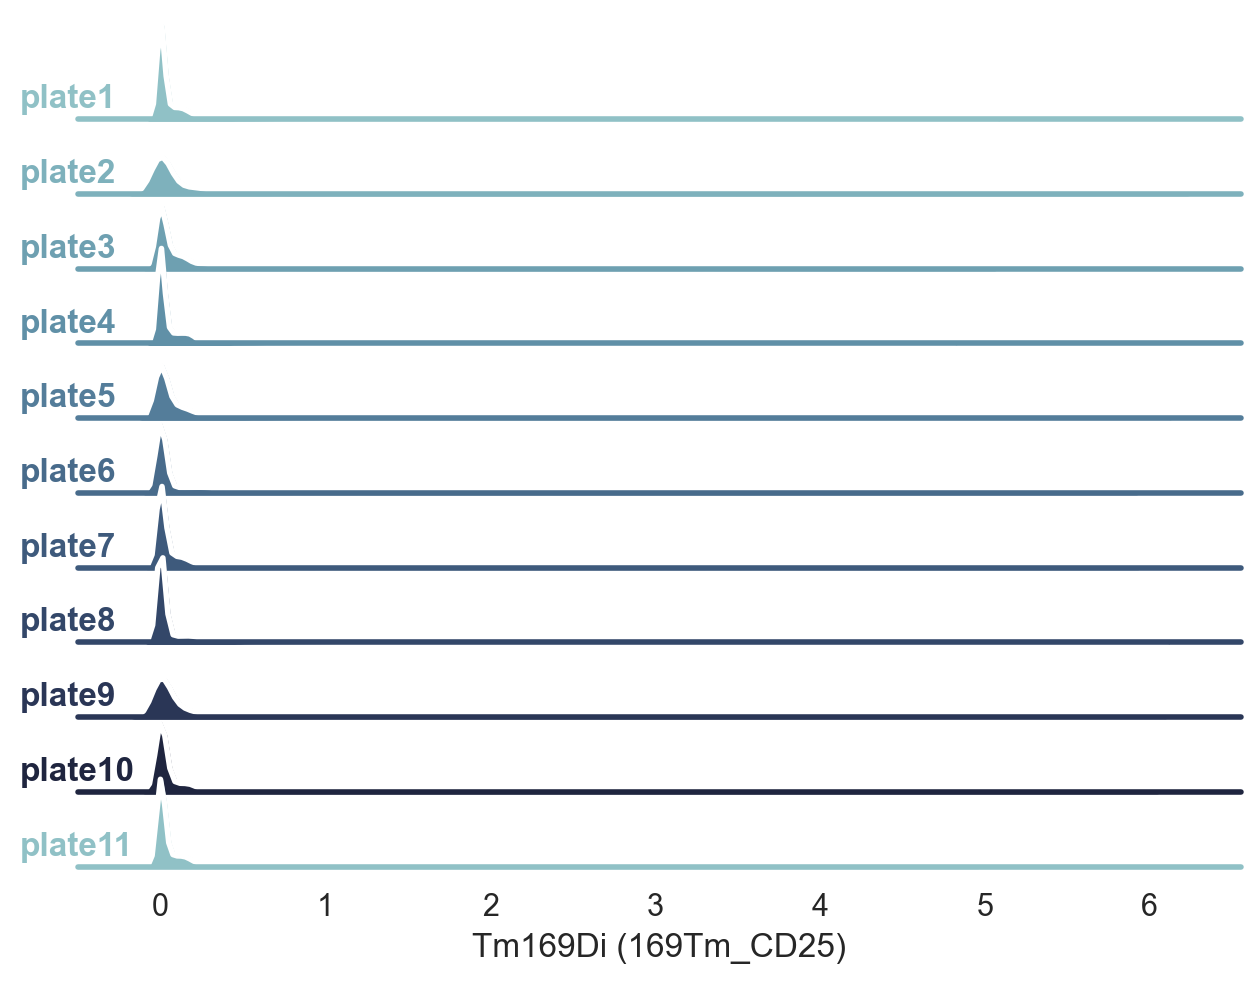

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

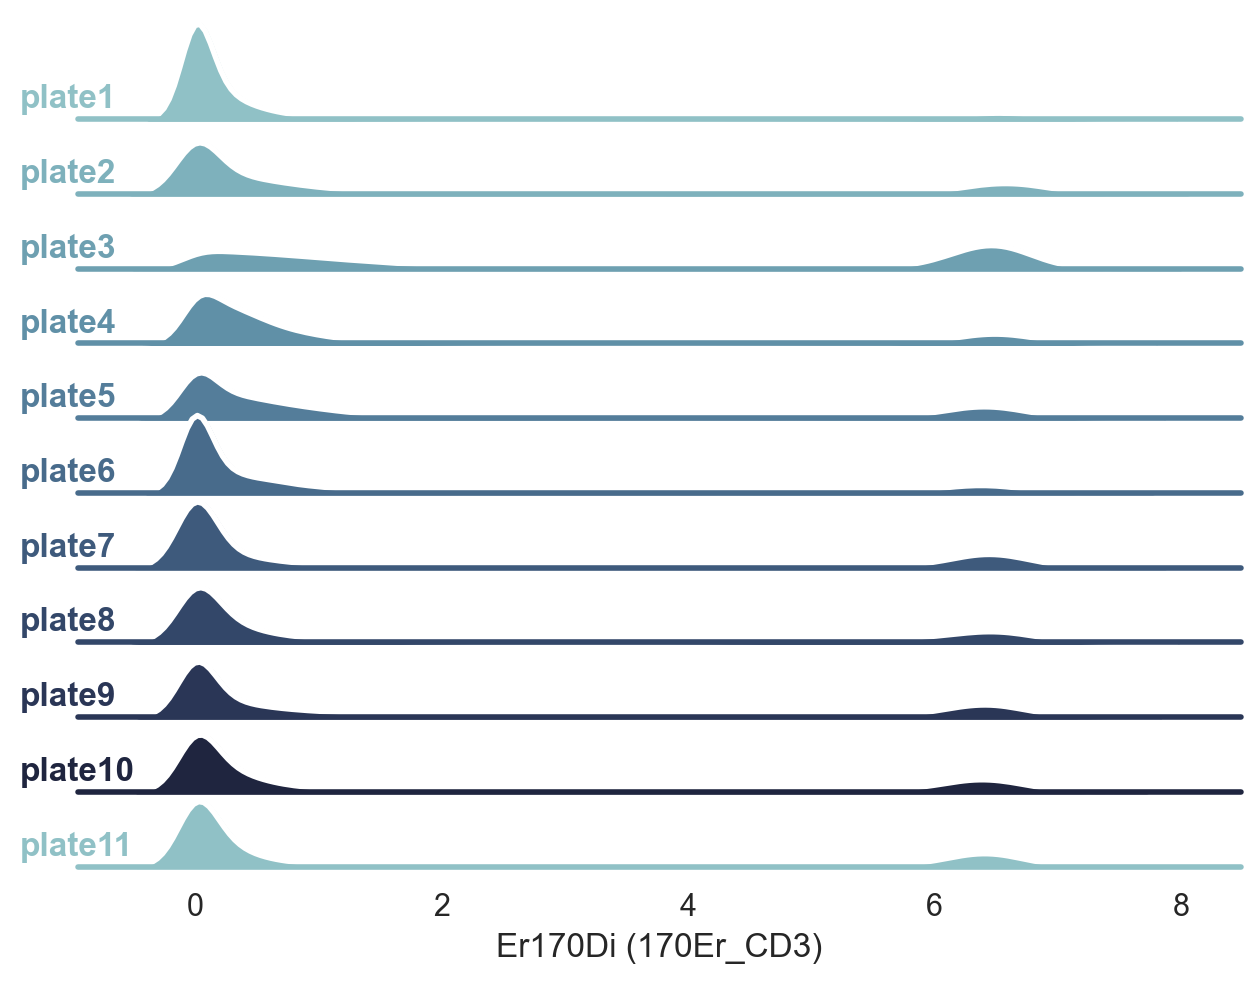

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

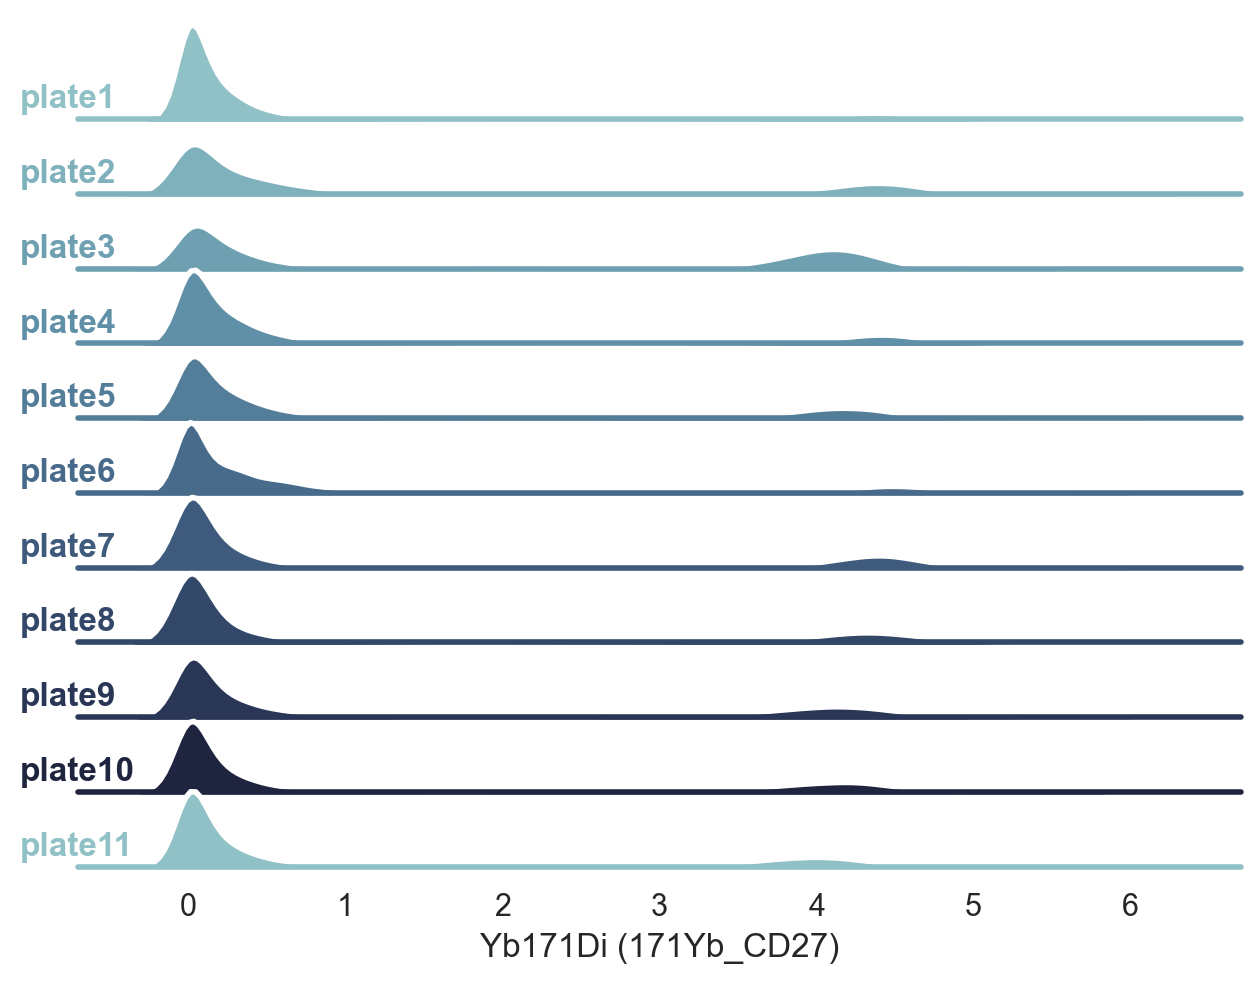

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

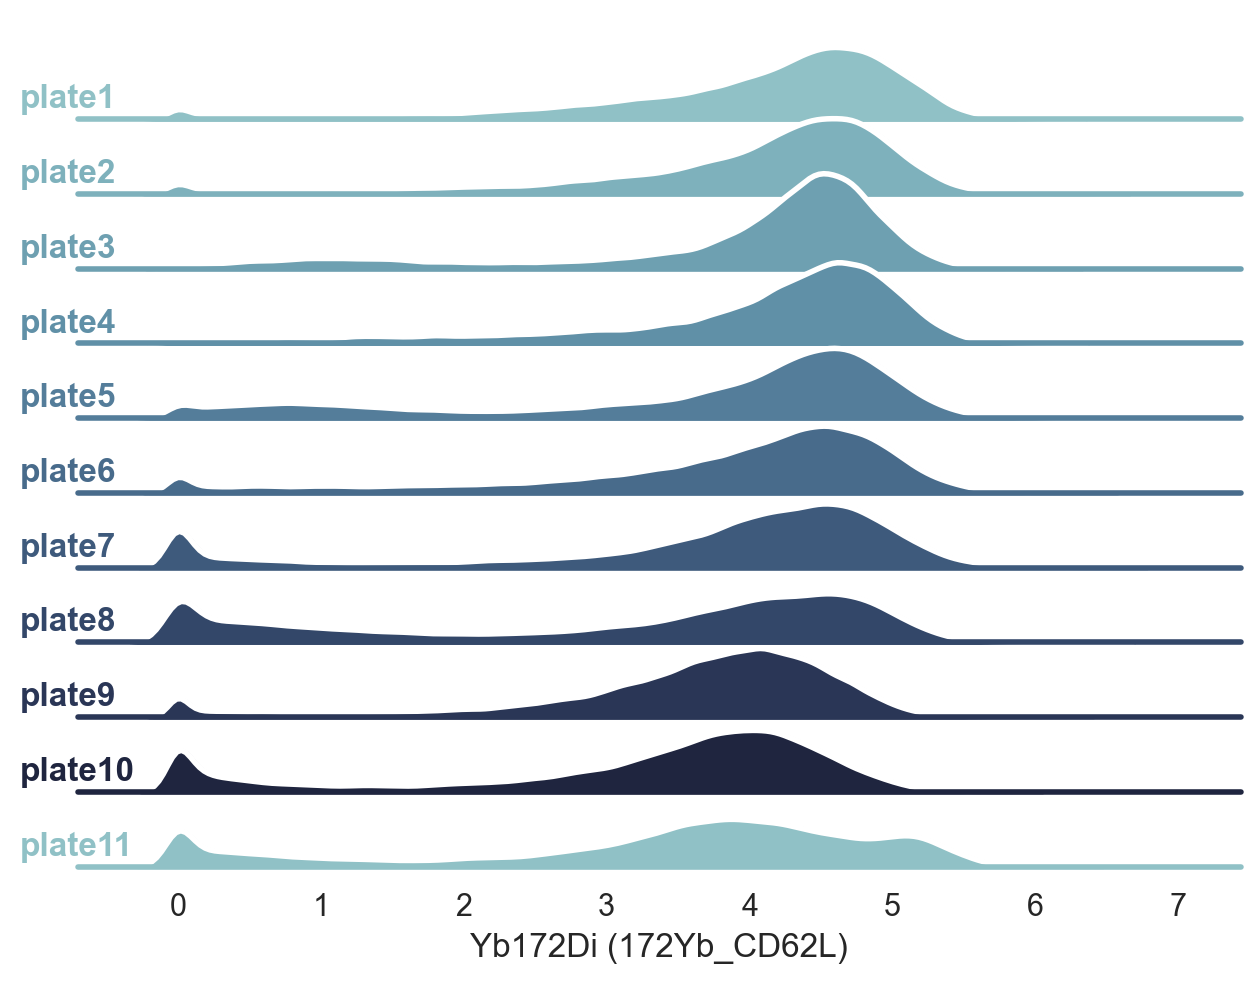

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

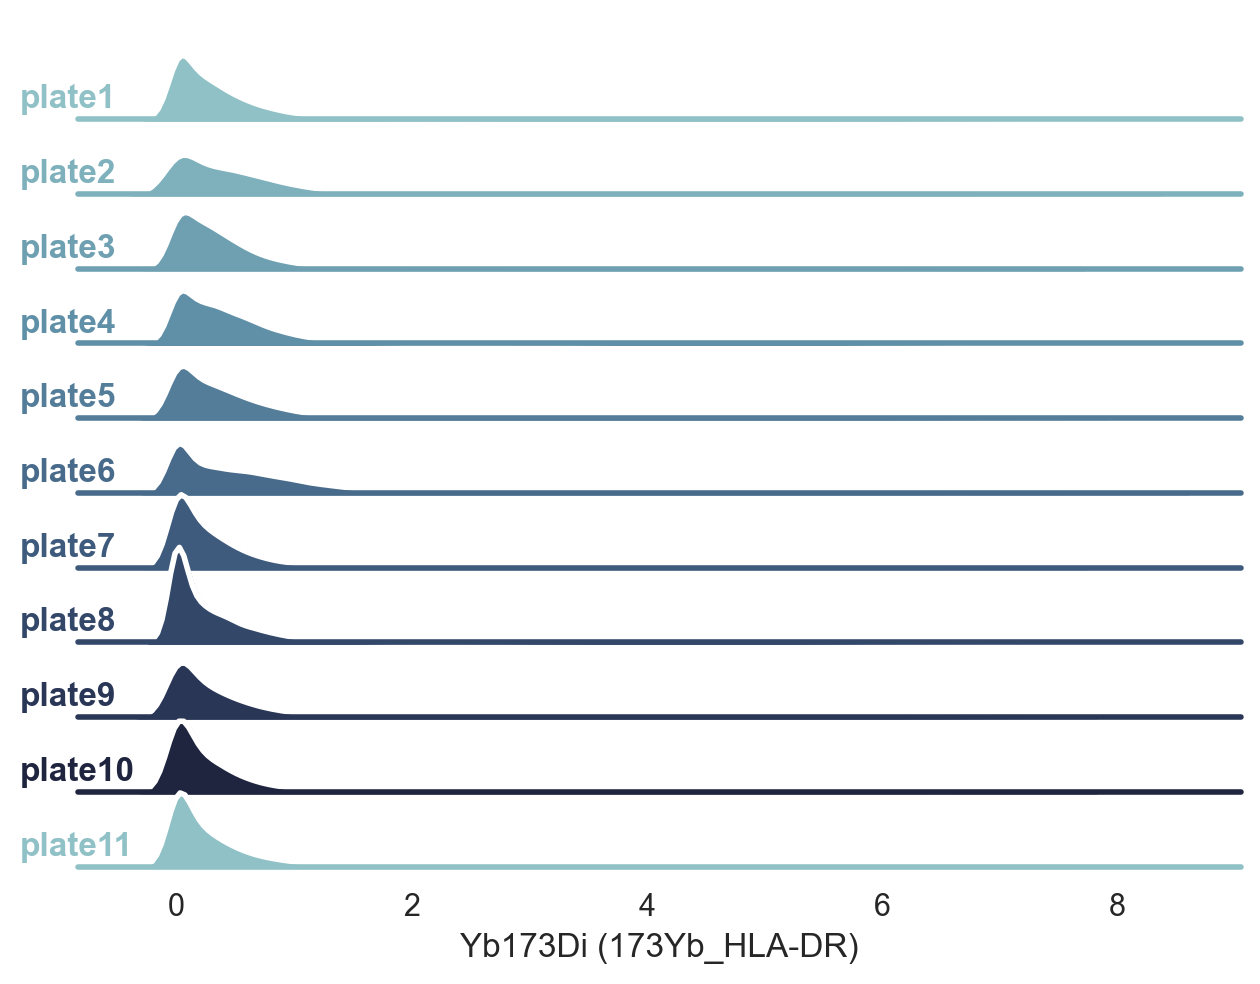

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

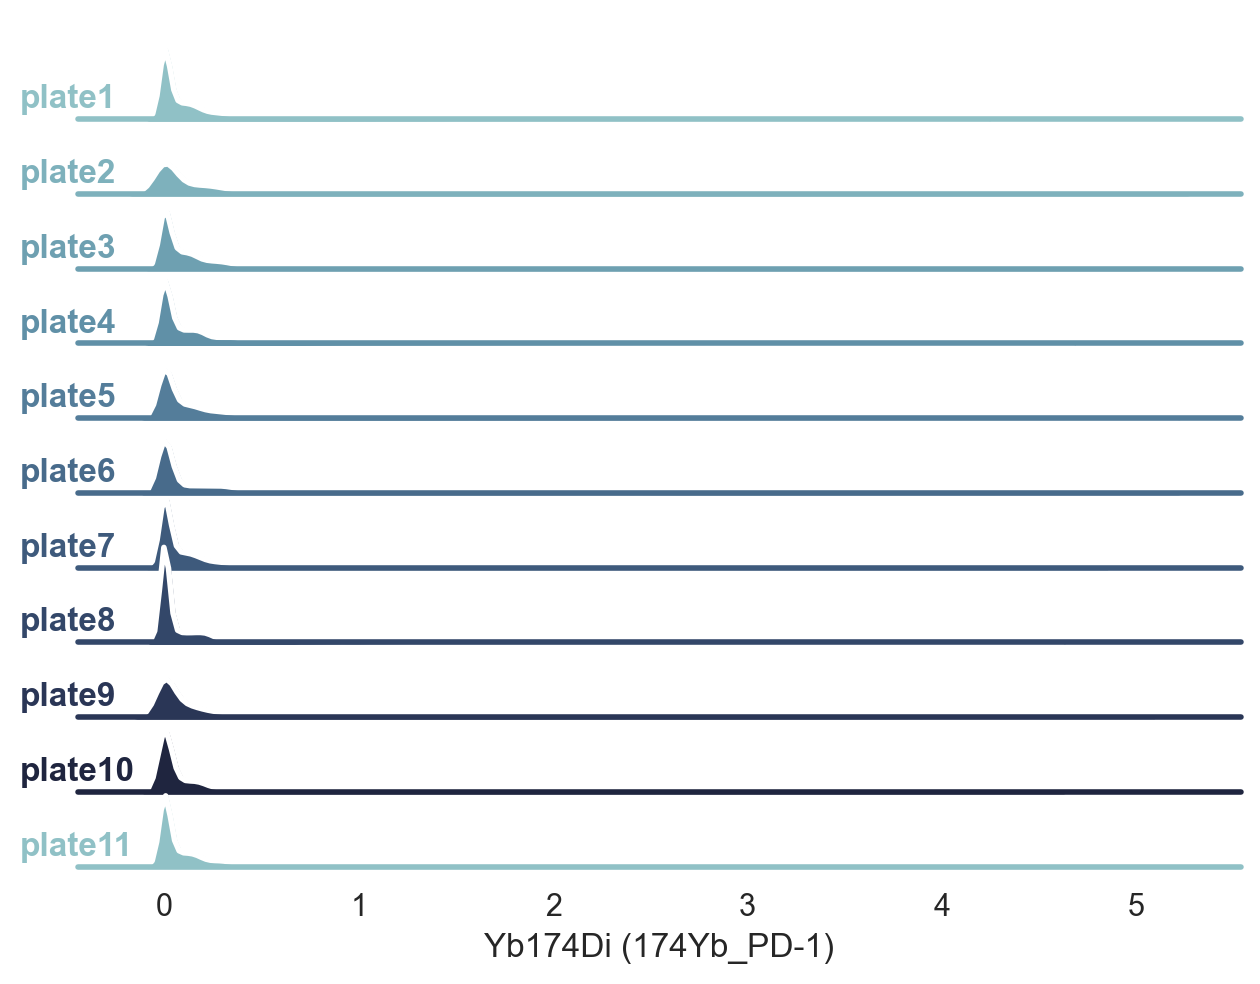

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

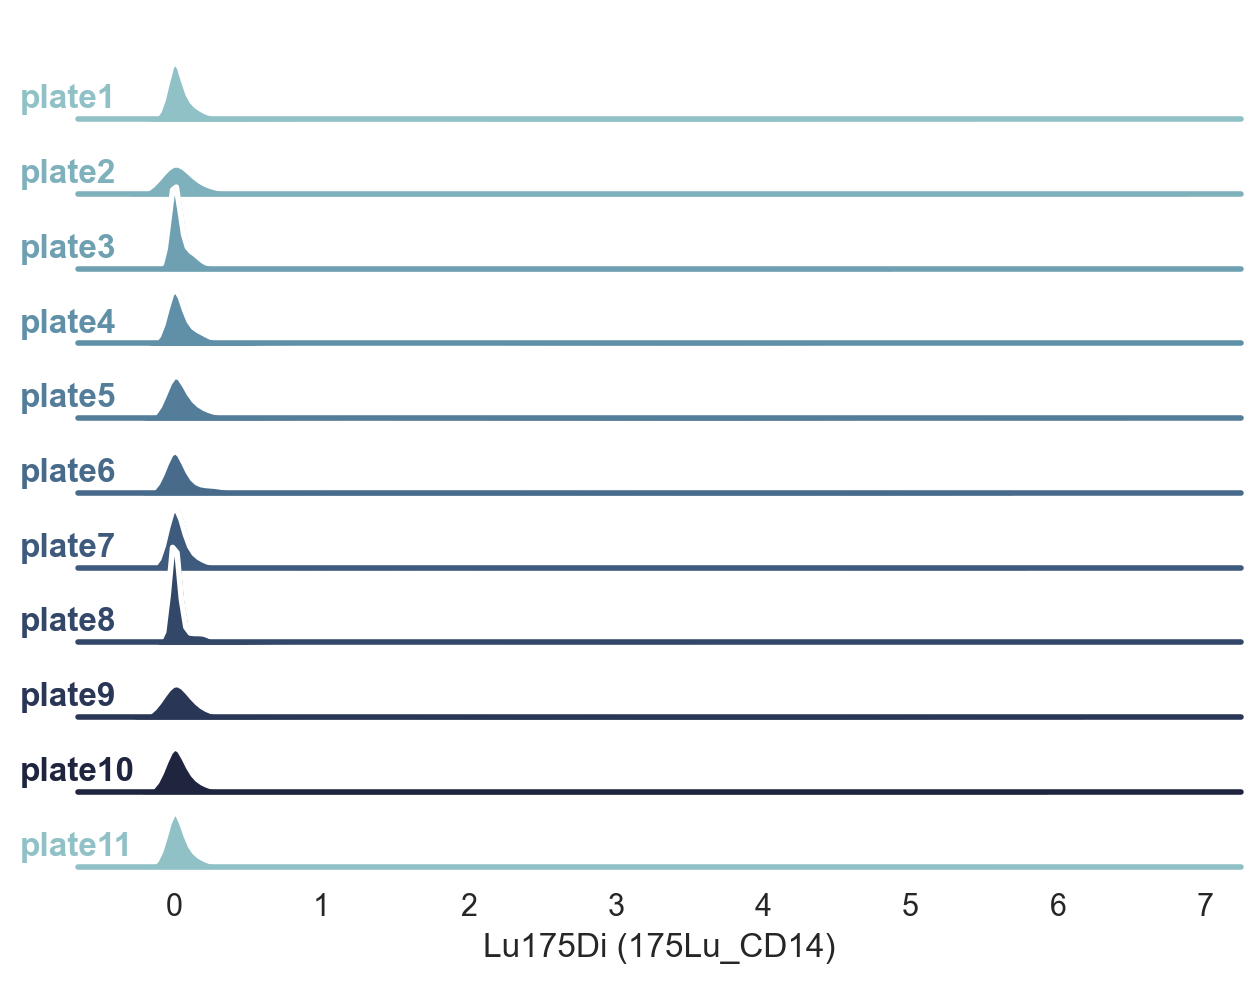

/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  self._figure.tight_layout(*args, **kwargs)
/Users/haidyi/Documents/proj/multi-stim/.venv/lib/python3.10/site-packages/seaborn/axisgrid.py:118: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enoug

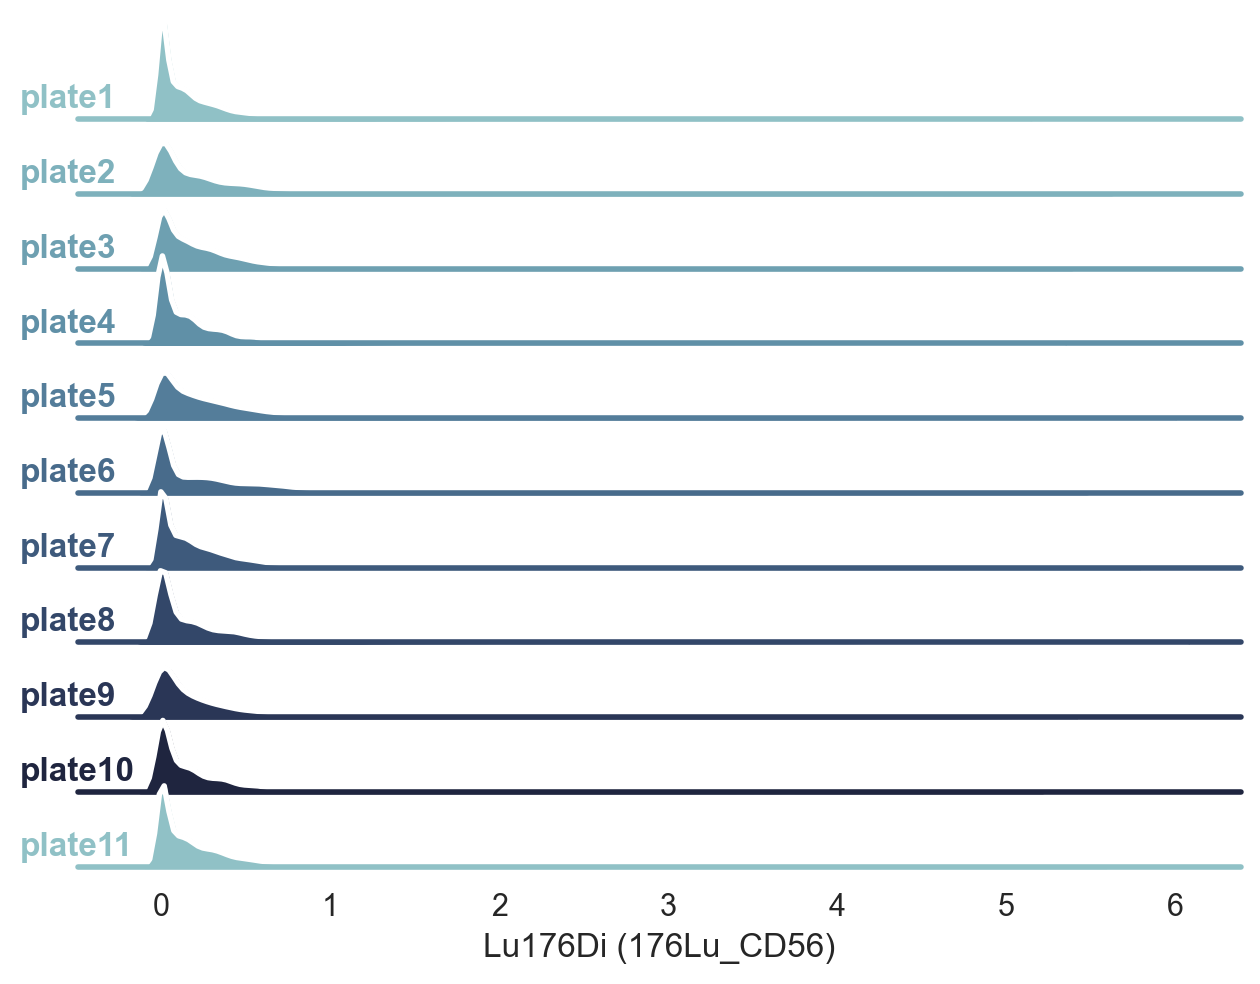

In [20]:
for marker in lineage_channels:

    pal = sns.cubehelix_palette(10, rot=-.25, light=.7)
    g = sns.FacetGrid(df_unstim, row="Plate_ID", hue="Plate_ID", aspect=15, height=.5, palette=pal)

    g.map(sns.kdeplot, marker,
          bw_adjust=.5, clip_on=False,
          fill=True, alpha=1, linewidth=1.5)
    g.map(sns.kdeplot, marker, clip_on=False, color="w", lw=2, bw_adjust=.5)

    g.refline(y=0, linewidth=2, linestyle="-", color=None, clip_on=False)

    def label(x, color, label):
        ax = plt.gca()
        ax.text(-.05, .2, label, fontweight="bold", color=color,
                ha="left", va="center", transform=ax.transAxes)

    g.map(label, marker)

    # Set the subplots to overlap
    g.figure.subplots_adjust(hspace=-.25)

    # Remove axes details that don't play well with overlap
    g.set_titles("")
    g.set(yticks=[], ylabel="")
    g.despine(bottom=True, left=True)

    plt.show()

In [6]:
dmgraph_df = pd.read_csv("/Users/haidyi/Desktop/Data/Preterm/Asinh_transformed_data_with_patient_demographics.csv", header=0, index_col=0)

In [7]:
dmgraph_df.set_index("ID", drop=True, inplace=True)
sample_meta = dmgraph_df[['Class', 'Category', 'Gestational.Age']]
sample_meta.index.name = "Sample_ID"

In [8]:
for key in adata:
    adata[key].obs = adata[key].obs.join(sample_meta, on="Sample_ID", how="left")

In [9]:
for key in adata:
    adata[key].obs.set_index('Sample_ID', drop=False, inplace=True)
    adata[key].obs.index.name = "Cell_ID"
    adata[key].obs_names_make_unique()

In [10]:
adata['Unstim'].obs.head()

,Sample_ID,Plate_ID,Stim,FCS_File,Class,Category,Gestational.Age
Cell_ID,,,,,,,
CB10T,CB10T,plate11,Unstim,plate11_CB10T_Unstim.tsv,Term,Term,39.0
CB10T-1,CB10T,plate11,Unstim,plate11_CB10T_Unstim.tsv,Term,Term,39.0
CB10T-2,CB10T,plate11,Unstim,plate11_CB10T_Unstim.tsv,Term,Term,39.0
CB10T-3,CB10T,plate11,Unstim,plate11_CB10T_Unstim.tsv,Term,Term,39.0
CB10T-4,CB10T,plate11,Unstim,plate11_CB10T_Unstim.tsv,Term,Term,39.0


In [11]:
from multistim.preprocessing._anndata import MultiAnnData

In [12]:
adata

{'IL246': AnnData object with n_obs × n_vars = 389158 × 53
     obs: 'Sample_ID', 'Plate_ID', 'Stim', 'FCS_File', 'Class', 'Category', 'Gestational.Age',
 'IFNa': AnnData object with n_obs × n_vars = 397779 × 53
     obs: 'Sample_ID', 'Plate_ID', 'Stim', 'FCS_File', 'Class', 'Category', 'Gestational.Age',
 'Unstim': AnnData object with n_obs × n_vars = 400000 × 53
     obs: 'Sample_ID', 'Plate_ID', 'Stim', 'FCS_File', 'Class', 'Category', 'Gestational.Age',
 'LPS': AnnData object with n_obs × n_vars = 393046 × 53
     obs: 'Sample_ID', 'Plate_ID', 'Stim', 'FCS_File', 'Class', 'Category', 'Gestational.Age'}

In [13]:
for key in adata:
    adata[key] = MultiAnnData(adata[key], sampleid="Sample_ID")
    adata[key].obs_to_sample(columns=["Plate_ID", "Stim", "Class", "Category", "Gestational.Age"])

In [14]:
import mudata as md

In [15]:
for key in adata:
    adata[key].obs.index = f"{key}-" + adata[key].obs.index

In [16]:
mdata = md.MuData(adata, axis=1)

In [17]:
mdata.update()
md.write_h5mu(os.path.join(home_dir, "Documents/proj/multi-stim/data/Preterm/Preterm.h5mu"), mdata)